<a href="https://colab.research.google.com/github/Bhushan0097/03.CAPSTONE.ML.Classification--Email-Campaign-Effectiveness-Prediction/blob/main/Notebook/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Email Campaign Effectiveness Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Buddhabhushan Nagrale
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

## Predicting Email Campaign Effectiveness
<hr>

### **Introduction:**
The landscape of digital marketing is evolving rapidly. Email campaigns remain a cornerstone for engaging with a target audience. In this era of data-driven decision-making, the effectiveness of email campaigns can be optimized through predictive analytics. This capstone project aims to develop a predictive model that evaluates and forecasts the success of email campaigns, providing marketers with valuable insights to enhance their strategies.

### **Objective:**
The primary objective of this project is to create a robust and accurate predictive model capable of assessing the effectiveness of email campaigns. By leveraging machine learning techniques, we aim to analyze historical campaign data and identify patterns and factors that contribute to successful campaigns. The ultimate goal is to empower marketing teams with a tool that can guide decision-making, leading to more impactful and targeted email campaigns.

### **Methodology:**
The project will employ a combination of data preprocessing, feature engineering, and machine learning algorithms. Historical email campaign data, including metrics such as open rates, click-through rates, and conversion rates, will be used to train and validate the model. Feature engineering will involve extracting relevant features from the data, considering variables such as time of day, subject line effectiveness, and recipient demographics. Various machine learning algorithms, including but not limited to logistic regression, decision trees, and ensemble methods, will be explored and compared for their predictive performance.

### **Key Components:**

- **Data Wrangling:** Extract meaningful features from the dataset to enhance the model's predictive capabilities. <br>
- **Feature Engineering:** Extract meaningful features from the dataset to enhance the model's predictive capabilities. <br>
- **Model Development:** Implement and train machine learning models on the prepared dataset. <br>
- **Evaluation:** Assess the performance of the models using appropriate metrics and refine as necessary. <br>
- **Deployment:** Develop a user-friendly interface or integrate the model into existing marketing platforms for seamless adoption by marketing teams.


### **Expected Outcomes:**

Upon successful completion of the project, we anticipate delivering a predictive model capable of evaluating email campaign effectiveness with a high degree of accuracy. The insights provided by the model can guide marketers in optimizing various elements of their campaigns, leading to improved engagement and ultimately higher conversion rates.

### **Significance:**
This project contributes to the evolving field of marketing analytics by providing a practical and data-driven solution to enhance email campaign effectiveness. The predictive model can serve as a valuable asset for marketing professionals seeking to allocate resources efficiently and maximize the impact of their email marketing efforts.

In conclusion, this capstone project addresses a pressing need in the digital marketing landscape and offers a tangible solution for improving the success of email campaigns through predictive analytics.



# **GitHub Link -**

https://github.com/Bhushan0097/03.CAPSTONE.ML.Classification--Email-Campaign-Effectiveness-Prediction

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
# connectign drive with colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Dataset First View

In [3]:
# Dataset First Look

path = '/content/gdrive/MyDrive/AlmaBetter/Module 6 Machine Learning/Capstone Project - Classification/'

Email_Df = pd.read_csv(path + 'data_email_campaign.csv')
Email_Df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

print('No of Rows    : ',Email_Df.shape[0])
print('No of Columns : ',Email_Df.shape[1])

No of Rows    :  68353
No of Columns :  12


### Dataset Information

In [5]:
# Dataset Info
Email_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(f'Total Number of Duplicate Records found : {Email_Df.duplicated(keep=False).sum()}')

Total Number of Duplicate Records found : 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

print(" Count total NaN at each column in a DataFrame : \n")
print(Email_Df.isnull().sum())

 Count total NaN at each column in a DataFrame : 

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64


In [8]:
# Visualizing the missing values
missing_nan = Email_Df.isnull().sum().reset_index()  #storing the data as a dataframe
missing_nan


,index,0
0,Email_ID,0
1,Email_Type,0
2,Subject_Hotness_Score,0
3,Email_Source_Type,0
4,Customer_Location,11595
5,Email_Campaign_Type,0
6,Total_Past_Communications,6825
7,Time_Email_sent_Category,0
8,Word_Count,0
9,Total_Links,2201


In [9]:
missing_nan.rename(columns = {'index':'column',0:'NaN_Count'}, inplace = True)
missing_nan.head(5)

,column,NaN_Count
0,Email_ID,0
1,Email_Type,0
2,Subject_Hotness_Score,0
3,Email_Source_Type,0
4,Customer_Location,11595


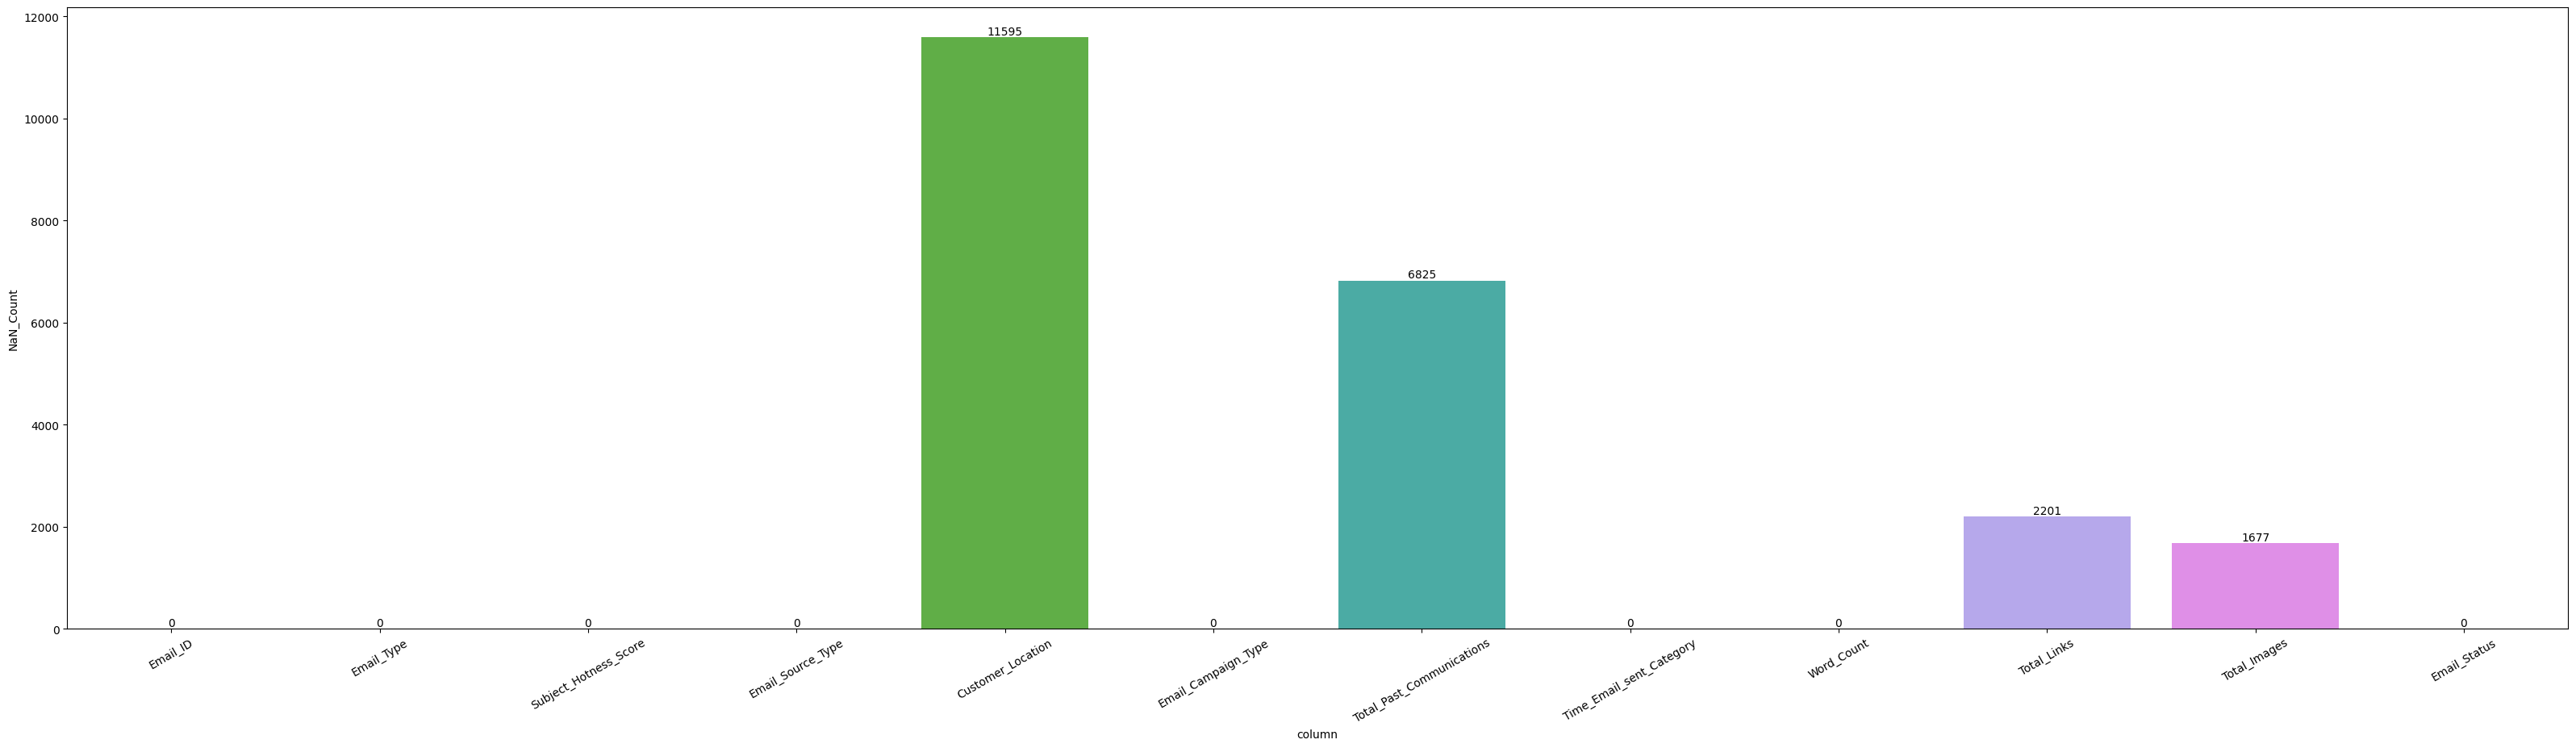

In [10]:
# Visualizing the missing values as Barplot

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(40, 10))

vis = sns.barplot(data=missing_nan, x="column", y="NaN_Count")

vis.set_xticklabels(labels=missing_nan['column'], rotation=30)  #rotaating X_labels

for i in vis.containers: # displaying the count number on top of each bar
    vis.bar_label(i)


# Show the plot
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
Email_Df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [12]:
# Dataset Describe

Email_Df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description

The description of the variables in the data_email_campaign.csv dataset :

<table>
    <thead>
      <tr>
        <th> <h4> <b> Sr. No </th>
        <th> <h4> <b> Column Name </th>
        <th> <h4> <b> Description</th>
      </tr>
    </thead>
    <tbody>
      <tr>
<td> <h5> 1 </h5></td>
<td> <h5> Email_Id </h5></td>
<td> <h5>  Email id of customer </h5></td>
</tr>
<tr>
<td> <h5> 2 </h5></td>
<td> <h5> Email_Type </h5></td>
<td> <h5>  Email type contains 2 categories :  1 and 2. We can assume that the types are like promotional email or sales email </h5></td>
</tr>
<tr>
<td> <h5> 3 </h5></td>
<td> <h5> Subject_Hotness_Score </h5></td>
<td> <h5>  It is the email’s subject’s score on the basis of how good and effective the content is </h5></td>
</tr>
<tr>
<td> <h5> 4 </h5></td>
<td> <h5> Email_Source_Type </h5></td>
<td> <h5>  It represents the source of the email like sales, marketing or product type email </h5></td>
</tr>
<tr>
<td> <h5> 5 </h5></td>
<td> <h5> Email_Campaign_Type </h5></td>
<td> <h5>  The campaign type of the email </h5></td>
</tr>
<tr>
<td> <h5> 6 </h5></td>
<td> <h5> Customer_Location </h5></td>
<td> <h5>  Categorical data which explains the different demographic location of the customers </h5></td>
</tr>
<tr>
<td> <h5> 7 </h5></td>
<td> <h5> Total_Past_Communications </h5></td>
<td> <h5>  This columns contains the total previous mails from the same source </h5></td>
</tr>
<tr>
<td> <h5> 8 </h5></td>
<td> <h5> Time_Email_sent_Category </h5></td>
<td> <h5>  The time of the day when the email was sent </h5></td>
</tr>
<tr>
<td> <h5> 9 </h5></td>
<td> <h5> Word_Count </h5></td>
<td> <h5>  Total count of word in each email </h5></td>
</tr>
<tr>
<td> <h5> 10 </h5></td>
<td> <h5> Total_links </h5></td>
<td> <h5>  Total number of links in the email </h5></td>
</tr>
<tr>
<td> <h5> 11 </h5></td>
<td> <h5> Total_Images </h5></td>
<td> <h5>  Total Number of images in the email </h5></td>
</tr>
<tr>
<td> <h5> 12 </h5></td>
<td> <h5> Email_Status </h5></td>
<td> <h5>  Our target variable which contains whether the mail was ignored, read, acknowledged by the reader </h5></td>
</tr>
    </tbody>
  </table>


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

from prettytable import PrettyTable #importing PrettyTable for tabular visualatization of data
tab = PrettyTable()

In [14]:


# Check Unique Values for each variable.

tab.field_names = ["Variable", "No. of Unique Values","Unique Values"]

for x in Email_Df:
  tab.add_row([x, Email_Df[x].nunique(),Email_Df[x].unique()])

tab.align["Variable"] = "l" #setting alingment of Column to left

print("Unique Values for each variable ")
print(tab)

Unique Values for each variable 
+---------------------------+----------------------+--------------------------------------------------------------------------+
| Variable                  | No. of Unique Values |                              Unique Values                               |
+---------------------------+----------------------+--------------------------------------------------------------------------+
| Email_ID                  |        68353         |     ['EMA00081000034500' 'EMA00081000045360' 'EMA00081000066290' ...     |
|                           |                      |       'EMA00089998436500' 'EMA00089999168800' 'EMA00089999316900']       |
| Email_Type                |          2           |                                  [1 2]                                   |
| Subject_Hotness_Score     |          51          | [2.2 2.1 0.1 3.  0.  1.5 3.2 0.7 2.  0.5 0.2 1.  4.  1.9 1.1 1.6 0.3 2.3 |
|                           |                      |  1.4 1.7 2.8 1.2 0

## 3. ***Data Wrangling***

### Data Wrangling Code

>  <h3>  <b> Dropping Columns  </h4>

<h4> <i> In the <b>Email_ID </b> column , each cell represents an unique ID associated with an email. Hence dropping the column <i>

In [15]:
Email_Df2 = Email_Df.drop(['Email_ID'], axis=1)
Email_Df2.head(5)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


>  <h3>  <b> Handling Missing Values  </h4>

In [16]:
missing_nan[missing_nan['NaN_Count'] > 0]

,column,NaN_Count
4,Customer_Location,11595
6,Total_Past_Communications,6825
9,Total_Links,2201
10,Total_Images,1677


<h4>1. <b> Understanding the columns </b>

- **Customer_Location :** Represents the demographic location of the customers
- **Total_Past_Communications** : No of previous mails from the same source
- **Total_Links** : Total number of links in the email
- **Total_Images** : Total Number of images in the email

<hr>

<h4> Replacing the missing values with <ol>
<li> <b>Mode value </b> for column Customer_Location </li>
<li> <b>Mean value </b> for column Total_Links </li>

In [17]:
# Customer_Location  and Total_Links, based on Email_Type , Subject_Hotness_Score  and Email_Source_Type combination the missing values will be updated

for a in Email_Df2['Email_Type'].unique() :
  for b in Email_Df2['Subject_Hotness_Score'].unique() :
    for c in Email_Df2['Email_Source_Type'].unique() :

      CL = Email_Df2[(Email_Df2['Email_Type'] == a) & (Email_Df2['Subject_Hotness_Score'] == b) & (Email_Df2['Email_Source_Type'] == c)]

      # only considering the combination where null values are more than 0
      if CL['Customer_Location'].isna().sum() != 0:
        update = CL['Customer_Location'].fillna(CL['Customer_Location'].mode()[0])

      # only considering the combination where null values are more than 0
      if CL['Total_Links'].isna().sum() != 0:
         replace_value = round(CL['Total_Past_Communications'].mean(),2)
         update2 = CL['Total_Links'].fillna(replace_value)

      #updating exisintg data frame
      Email_Df2.update(update)
      Email_Df2.update(update2)

#Checking for Customer_Location if Null is present
print("No of Null rows present in \nCustomer_Location Column :",Email_Df2['Customer_Location'].isna().sum())
print("Total_Links Column :",Email_Df2['Total_Links'].isna().sum())

No of Null rows present in 
Customer_Location Column : 0
Total_Links Column : 0


<ol>3. <b>Mean value </b> for column Total_Past_Communications </li>

In [18]:
#Total_Past_Communications : based on Email_Type , Subject_Hotness_Score , Customer_Location  and Email_Source_Type combination the missing values will be updated

for a in Email_Df2['Email_Type'].unique() :
  for b in Email_Df2['Subject_Hotness_Score'].unique() :
    for c in Email_Df2['Email_Source_Type'].unique() :
      for d in Email_Df2['Customer_Location'].unique() :
         TPC1 = Email_Df2[(Email_Df2['Email_Type'] == a) & (Email_Df2['Subject_Hotness_Score'] == b) & (Email_Df2['Email_Source_Type'] == c)  ]
         TPC2 = TPC1[(TPC1['Customer_Location'] == d) ]

         # only considering the combination where null values are more than 0
         if TPC2['Total_Past_Communications'].isna().sum() != 0:
          replace_value = round(TPC2['Total_Past_Communications'].mean(),2)

          update_ = TPC2['Total_Past_Communications'].fillna(replace_value)
          #updating exisintg data frame
          Email_Df2.update(update_)

#Checking for Customer_Location if Null is present
print("No of Null rows present in Total_Past_Communications Column :",Email_Df2['Total_Past_Communications'].isna().sum())

No of Null rows present in Total_Past_Communications Column : 13


In [19]:
#replacing remaining values with ffill

Email_Df2['Total_Past_Communications'].ffill(axis = 0 , inplace=True)

#Checking for Customer_Location if Null is present
print("No of Null rows present in Total_Past_Communications Column :",Email_Df2['Total_Past_Communications'].isna().sum())

No of Null rows present in Total_Past_Communications Column : 0


<ol>4. <b>Filling with zero</b> for column Total_Images </li>

In [20]:
Email_Df2['Total_Images'] = Email_Df2['Total_Images'].fillna(0)
print("No of Null rows present in Total_Images Column :",Email_Df2['Total_Images'].isna().sum())

No of Null rows present in Total_Images Column : 0


In [21]:
# Creating a copy of the DataFrame using the copy() method
Email_Df3 = Email_Df2.copy()

>  <h3>   <b> Converting data types  </h4>

In [22]:
print('Colums that contain numerical values but are identified as Categorical' )
print('-'*100)

Col = []
for x in Email_Df2 :
   if Email_Df2[x].nunique() < 10  and Email_Df2[x].dtypes != 'O':
    Col.append(x)
    print(x)

Colums that contain numerical values but are identified as Categorical
----------------------------------------------------------------------------------------------------
Email_Type
Email_Source_Type
Email_Campaign_Type
Time_Email_sent_Category
Email_Status


The description of the variables in the data_email_campaign.csv dataset :

<table>
    <thead>
      <tr>
        <th> <h4> <b> Sr. No </th>
        <th> <h4> <b> Column Name </th>
        <th> <h4> <b> Values </th>
        <th> <h4> <b> Replaced</th>
      </tr>
    </thead>
    <tbody>
      
<tr>
<td> <h6> 1 </h6></td>
<td> <h6> Email_Type </h6></td>
<td> <h6>  1 , 2 </h6></td>
<td> <h6> 1 :  Marketing , 2 :  Important Updates</h6></td>
</tr>

<tr>
<td> <h6> 2</h6></td>
<td> <h6> Email_Source_Type </h6></td>
<td> <h6>  1 ,2 </h6></td>
<td> <h6>   1 :  Sales and Marketing , 2 : Important Admin Mail </h6></td>
</tr>
<tr>
<td> <h6> 3 </h6></td>
<td> <h6> Email_Campaign_Type </h6></td>
<td> <h6>  1,2 , 3 </h6></td>
<td> <h6>  1 : Campaign1 ,2 :  Campaign2  , 3: Campaign3 </h6></td>
</tr>


<tr>
<td> <h6>4 </h6></td>
<td> <h6> Time_Email_sent_Category </h6></td>
<td> <h6>  1 ,2 ,3  </h6></td>
<td> <h6>  1 : Morning,2 : Afternoon, 3 : Night </h6></td>
</tr>

<td> <h6> 5 </h6></td>
<td> <h6> Email_Status </h6></td>
<td> <h6>  1, 2, 3 </h6></td>
<td> <h6>  0 : ignored, 1: read, 2 : acknowledged</h6></td>
</tr>
    </tbody>
  </table>


In [23]:
# Define a mapping dictionary
mapping_1 = {1:"Marketing" , 2 :"Important Updates"}
mapping_2 = {1 : "Sales and Marketing" , 2 : "Important Admin Mail"}
mapping_3 = {1 : "Campaign1" ,2 : "Campaign2" , 3: "Campaign3"}
mapping_4 = {1 : "Morning",2 : "Afternoon", 3 : "Night"}
mapping_5 = {0 : "ignored", 1: "read", 2 : "acknowledged"}

mappings = [mapping_1, mapping_2, mapping_3, mapping_4, mapping_5]


In [24]:
for x ,y in zip(Col ,mappings):
  Email_Df2[x] = Email_Df2[x].replace(y)

Email_Df2[Col]

,Email_Type,Email_Source_Type,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,Marketing,Important Admin Mail,Campaign2,Morning,ignored
1,Important Updates,Sales and Marketing,Campaign2,Afternoon,ignored
2,Important Updates,Sales and Marketing,Campaign3,Afternoon,read
3,Marketing,Important Admin Mail,Campaign2,Afternoon,ignored
4,Marketing,Important Admin Mail,Campaign3,Afternoon,ignored
...,...,...,...,...,...
68348,Important Updates,Sales and Marketing,Campaign2,Night,ignored
68349,Marketing,Sales and Marketing,Campaign2,Afternoon,ignored
68350,Marketing,Important Admin Mail,Campaign2,Afternoon,ignored
68351,Marketing,Sales and Marketing,Campaign2,Morning,ignored


In [25]:


# Check Unique Values for each variable.
ntab = PrettyTable()
ntab.field_names = ["Variable", "No. of Unique Values","Unique Values"]

for x in Email_Df2[Col]:
  ntab.add_row([x, Email_Df2[x].nunique(),Email_Df2[x].unique()])

ntab.align["Variable"] = "l" #setting alingment of Column to left

print("Unique Values for each variable ")
print(ntab)

Unique Values for each variable 
+--------------------------+----------------------+------------------------------------------------+
| Variable                 | No. of Unique Values |                 Unique Values                  |
+--------------------------+----------------------+------------------------------------------------+
| Email_Type               |          2           |       ['Marketing' 'Important Updates']        |
| Email_Source_Type        |          2           | ['Important Admin Mail' 'Sales and Marketing'] |
| Email_Campaign_Type      |          3           |     ['Campaign2' 'Campaign3' 'Campaign1']      |
| Time_Email_sent_Category |          3           |        ['Morning' 'Afternoon' 'Night']         |
| Email_Status             |          3           |       ['ignored' 'read' 'acknowledged']        |
+--------------------------+----------------------+------------------------------------------------+


>  <h3>  <b> Univariate Analysis </h4>

<h5> <b> Subject_Hotness_Score : </b> Email's subject's score on the basis of how good and effective the content is

In [26]:
#Function to display the Distribution Plot

def hist_plot(Column , title):
  fig, ax = plt.subplots(figsize=(8,4))
  fig.suptitle(title)

  sns.histplot(Column, kde = True)

  plt.axvline(Column.mean(), color= 'Red', linestyle = 'dashed', linewidth =1.5 ,label = 'Mean')
  plt.axvline(Column.median(), color= 'Green', linestyle = 'dashed', linewidth =1.5 ,label = 'Median')
  plt.axvline(Column.mode()[0], color= '#512E5F', linestyle = 'dashed', linewidth =1.5 ,label = 'Mode')

  # place legend outside
  plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

  plt.show()

  print("Mean   : ",Column.mean())
  print("Median : ",Column.median())
  print("Mode   : ",Column.mode()[0] )


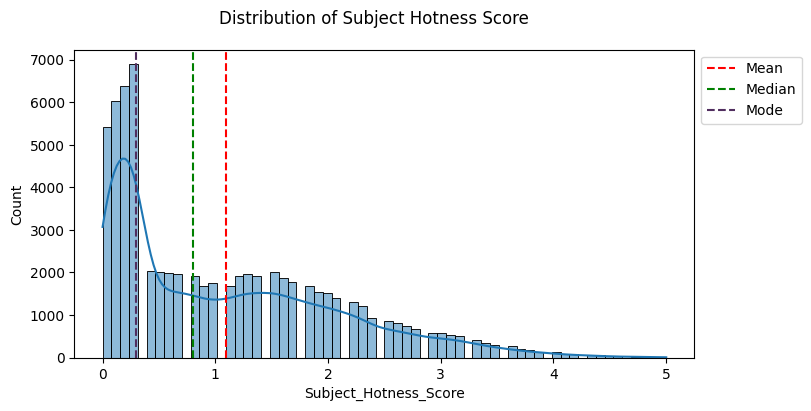

Mean   :  1.0954808128392317
Median :  0.8
Mode   :  0.3


In [27]:
hist_plot(Email_Df2['Subject_Hotness_Score'], 'Distribution of Subject Hotness Score' )

In [28]:
def count_plot(Column, title , xlabel , ylabel):
  # Get the counts of each category
  category_counts = Column.value_counts()

  # Sort the categories by count in descending order
  sorted_categories = category_counts.index

  fig, ax = plt.subplots(figsize=(8, 6))
  bar_plot3 = sns.countplot(x =Column , order=sorted_categories )

  for i in bar_plot3.containers: # displaying the count number on top of each bar
      bar_plot3.bar_label(i , size='small')

  plt.title(title, fontsize=15, fontweight=0, loc='center' , style='normal' )
  plt.xlabel(xlabel)
  plt.ylabel( ylabel)

  plt.show()

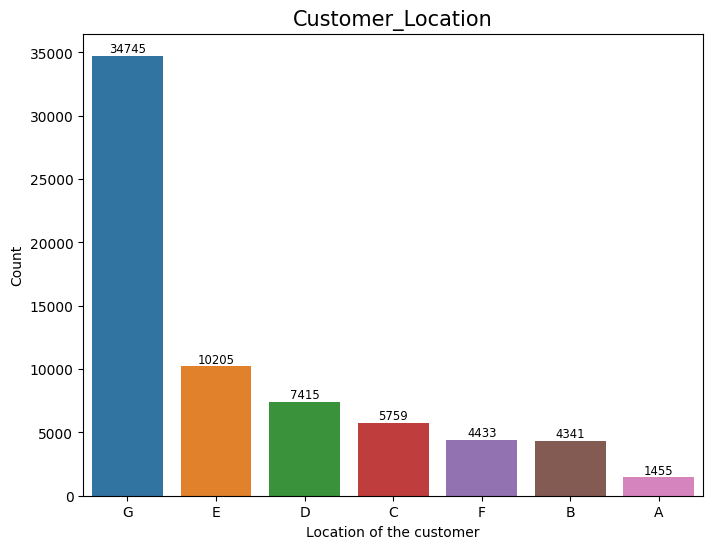

In [29]:
count_plot(Email_Df2['Customer_Location'],"Customer_Location",'Location of the customer','Count')

<h5> <b> Total_Past_Communications : </b> Total previous mails from the same source

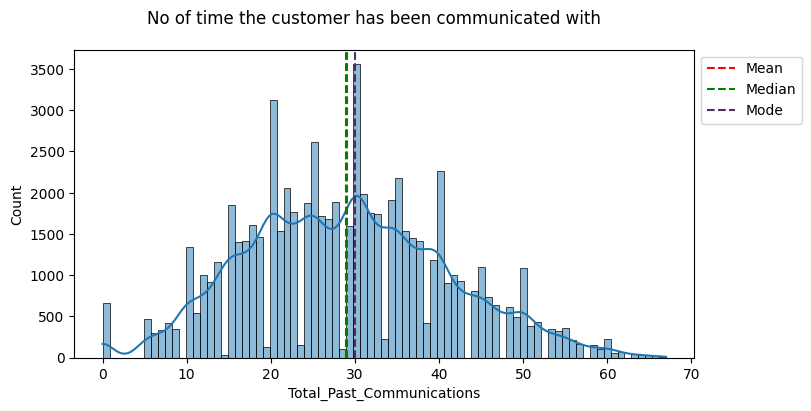

Mean   :  28.93082015419952
Median :  29.0
Mode   :  30.0


In [30]:
hist_plot(Email_Df2['Total_Past_Communications'], 'No of time the customer has been communicated with' )

<h5> <b> Email_Status (Target Vaariable) </b>

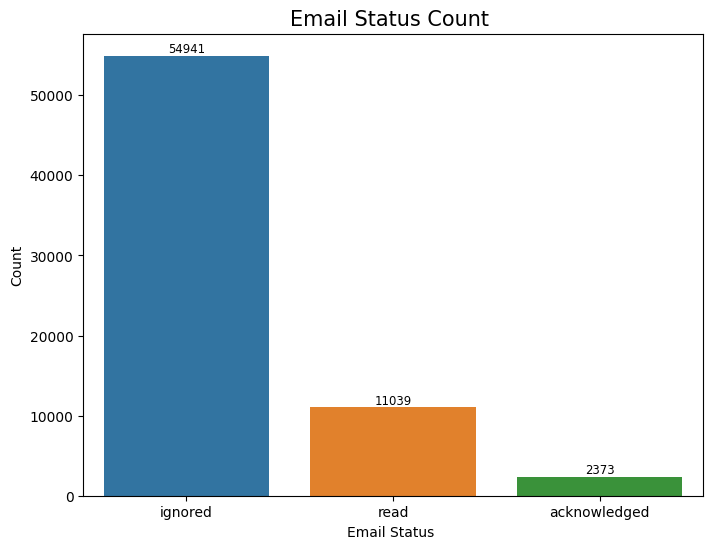

In [31]:
count_plot(Email_Df2['Email_Status'],"Email Status Count ",'Email Status ','Count')

### What all manipulations have you done and insights you found?

<ul> <h3>  <b> Manipulations performed on the data <br> ---------------------------------------------------------------</b></h3>

<ol>
 <li><b>  Dropping Columns :  </b> Dropped Email_ID column </li>  
  <li><b> Handeling Missing Values :  </b> Repalced the missing values for Customer_Location ,Total_Past_Communications,Total_Links  and Total_Images  </li>  
  <li><b> Converting DataTypes :  </b>
  <li><b> Univariate Analysis :  </b>
   <ul>
   <li>  The Subject_Hotness_Score represents the value/score an email body is given, the range is in between 0 to 5. <br> Most Emails are given Subject Hotness Score of 0.3   </li>  
   <li>  The dataset has stored email data of  7 different locations : A,B,C,D,E,F,G.    </li>  
   <li>  On an averga a customer has been communicated with atleast 28 times in the past    </li>  
  <li> Target Variable ( Email_Status) is imbalanced dataset   </li>  
 </ol>

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

>  <h2> <b> <font color ="#333"> Distribution of Target Variable  (Email_Status) </div> </b>


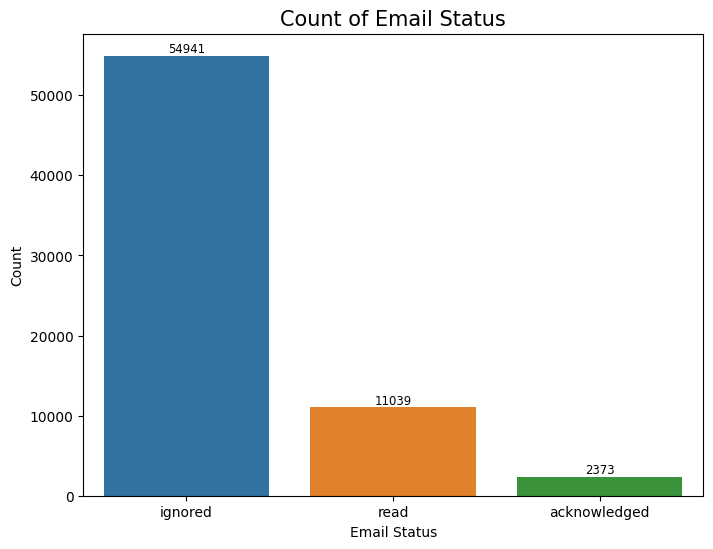

In [32]:
# Chart - 1 visualization code

count_plot(Email_Df2['Email_Status'],"Count of Email Status",'Email Status','Count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

>  <h2> <b> <font color ="#333">
Box Plot of Independent Variables  (Numerical Variable) </div> </b>

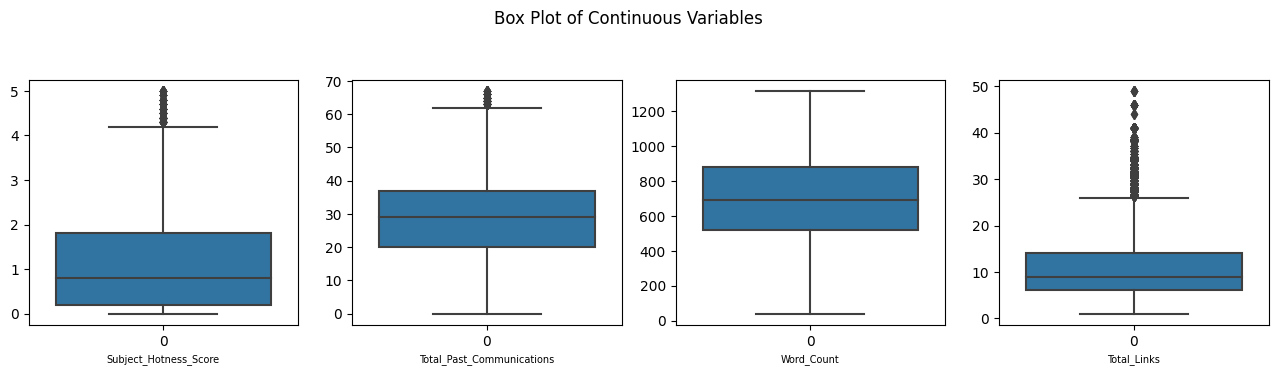

In [33]:
# Chart - 2 visualization code

numericals = [features for features in Email_Df2.columns if Email_Df2[features].dtypes != 'O']


fig, ax = plt.subplots(figsize=(16,7))

fig.suptitle('Box Plot of Continuous Variables')

for m,n in zip(range(1,len(numericals)),numericals):

  plt.subplot(2,4,m)
  boxplot = sns.boxplot(data = Email_Df2[n])
  boxplot.set_xlabel(n, fontsize=7)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

>  <h2> <b> <font color ="#333">  Count plot of Email Type and Email Status </div> </b>



In [34]:
#objects = [features for features in Email_Df2.columns if Email_Df2[features].dtypes == 'O']
#objects

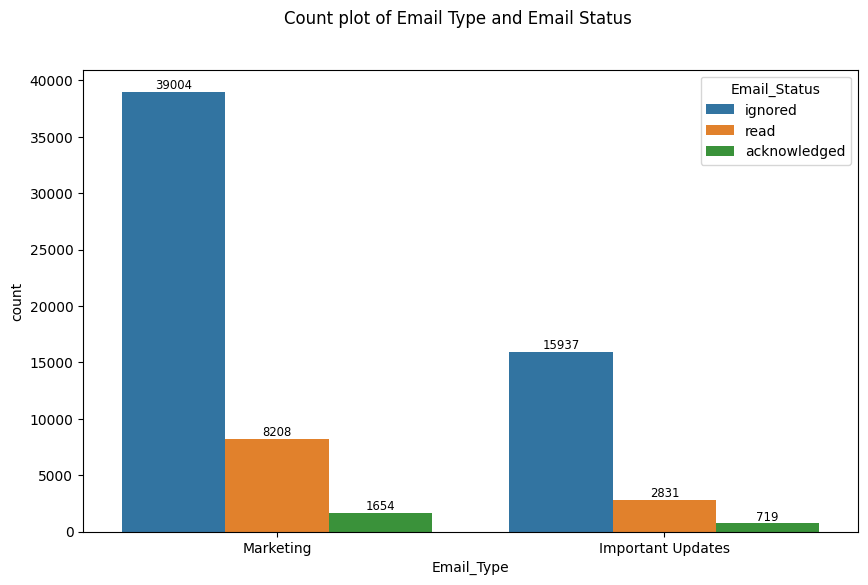

In [35]:
# Chart - 3 visualization code

fig, axes = plt.subplots(figsize=(10, 6))

fig.suptitle('Count plot of Email Type and Email Status')

plot3 = sns.countplot(x="Email_Type", hue="Email_Status", data=Email_Df2)

#Display count values each bar
for container in plot3.containers:
    plot3.bar_label(container, size='small')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [36]:
Email_Df2.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,Marketing,2.2,Important Admin Mail,E,Campaign2,33.0,Morning,440,8.0,0.0,ignored
1,Important Updates,2.1,Sales and Marketing,G,Campaign2,15.0,Afternoon,504,5.0,0.0,ignored
2,Important Updates,0.1,Sales and Marketing,B,Campaign3,36.0,Afternoon,962,5.0,0.0,read
3,Marketing,3.0,Important Admin Mail,E,Campaign2,25.0,Afternoon,610,16.0,0.0,ignored
4,Marketing,0.0,Important Admin Mail,C,Campaign3,18.0,Afternoon,947,4.0,0.0,ignored


#### Chart - 4

>  <h2> <b> <font color ="#333">  Distribution of Subject Hotness score w.r.to  Email Status  </div> </b>



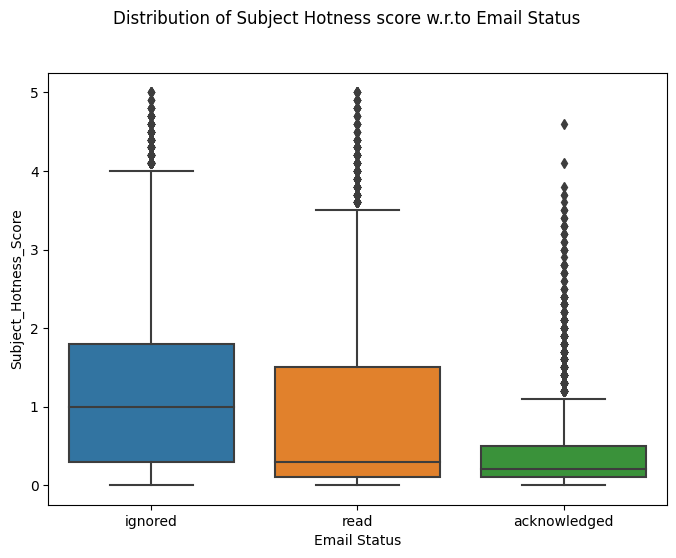

In [37]:
# Chart - 4 visualization code

fig, axes = plt.subplots(figsize=(8,6)) #displaying two subplots in a single plot
fig.tight_layout(pad=5.0) #spacing between plots
fig.suptitle('Distribution of Subject Hotness score w.r.to Email Status')

plot = sns.boxplot( x='Email_Status',y='Subject_Hotness_Score', data=Email_Df2)

plot.set_xlabel("Email Status")
plot.set_ylabel("Subject_Hotness_Score")

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

>  <h2> <b> <font color ="#333"> Email Source type influence on  Email Status  </div> </b>

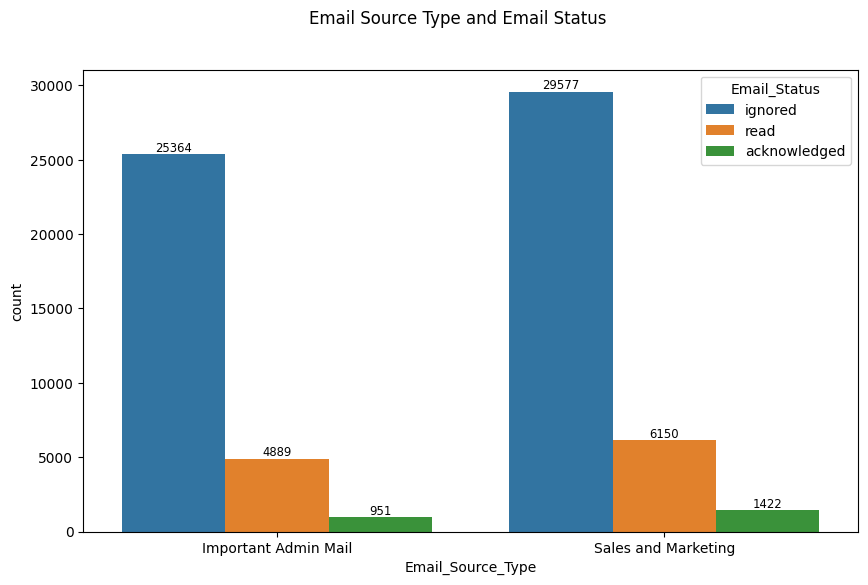

In [38]:
# Chart - 5 visualization code


fig, axes = plt.subplots(figsize=(10, 6))

fig.suptitle('Email Source Type and Email Status')

plot3 = sns.countplot(x="Email_Source_Type", hue="Email_Status", data=Email_Df2 )

#Display count values each bar
for container in plot3.containers:
    plot3.bar_label(container, size='small')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

>  <h2> <b> <font color ="#333"> Relationship between Email Type
 , Word Count and Email Status </div> </b>

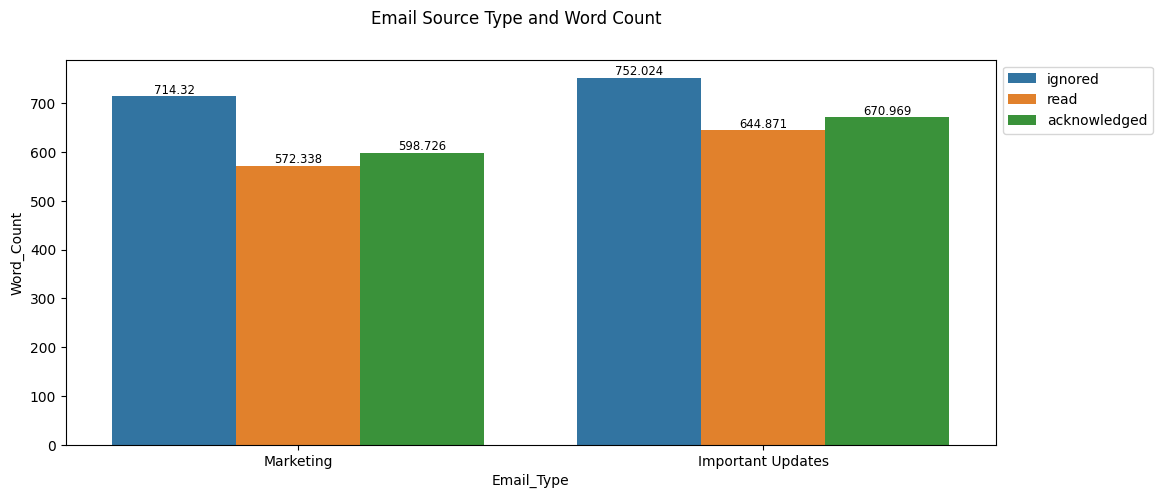

In [39]:
# Chart - 6 visualization code

fig, axes = plt.subplots(figsize=(12, 5))

fig.suptitle('Email Source Type and Word Count')

plot6 = sns.barplot(Email_Df2, x="Email_Type", y="Word_Count", hue="Email_Status" ,estimator="mean",errorbar=None)

#Display count values each bar
for container in plot6.containers:
    plot6.bar_label(container, size='small')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

> <h2> <b> <font color ="#333"> Email Status as per Customer Location

In [40]:
CL_Data = Email_Df2.groupby(['Customer_Location' , 'Email_Status'])['Email_Status'].count().reset_index(name="Status_Count")
CL_Data

,Customer_Location,Email_Status,Status_Count
0,A,acknowledged,49
1,A,ignored,1161
2,A,read,245
3,B,acknowledged,125
4,B,ignored,3502
5,B,read,714
6,C,acknowledged,214
7,C,ignored,4655
8,C,read,890
9,D,acknowledged,250


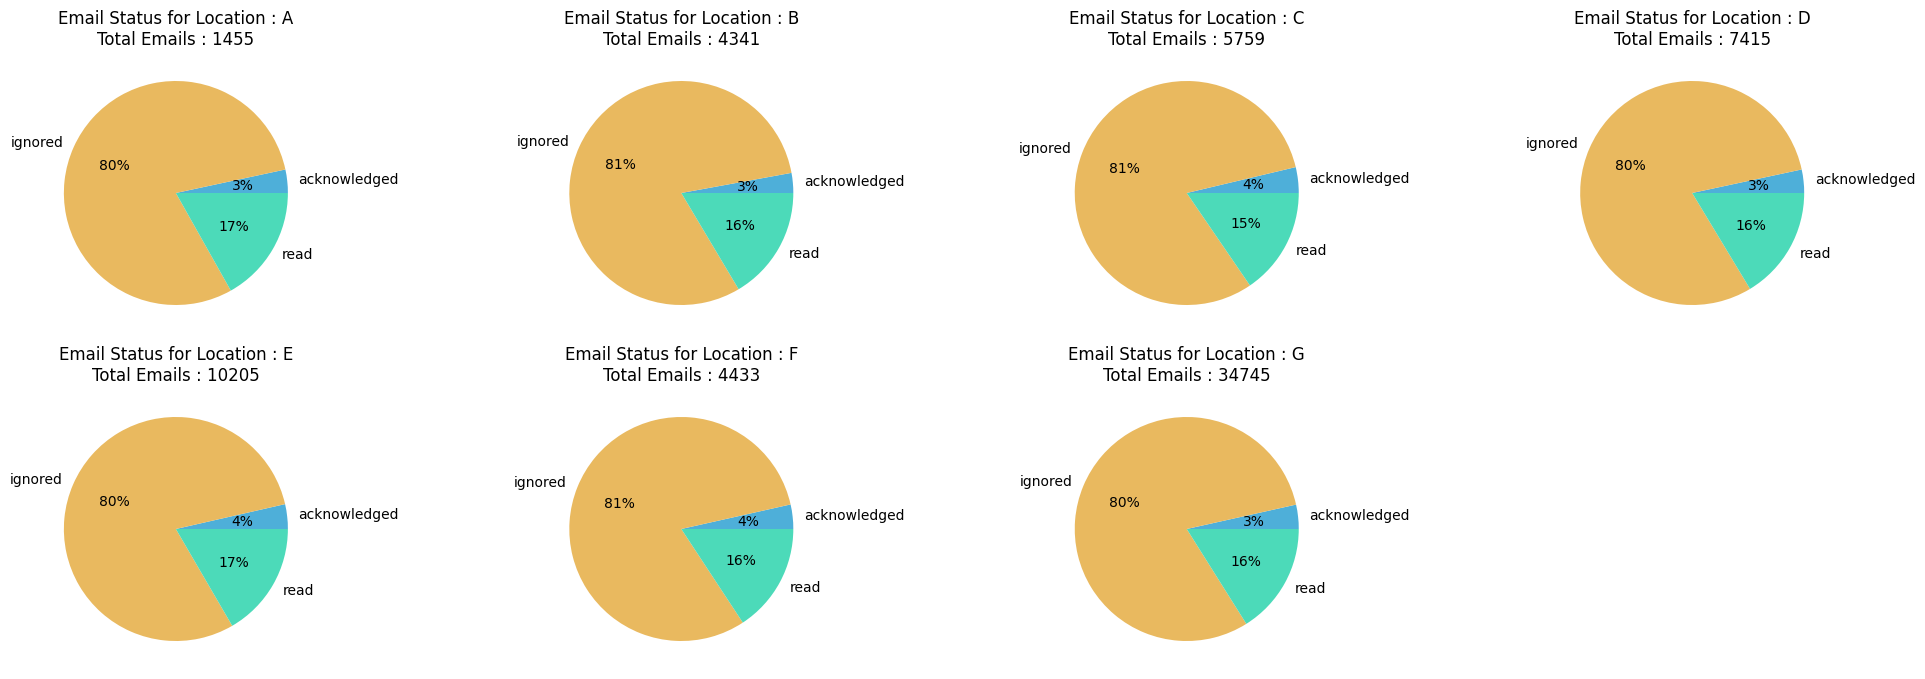

In [41]:
# Chart - 7 visualization code
plt.figure(figsize=(25,8))
plt.tight_layout(pad=10.0)

# define Seaborn color palette to use
palette_color = ['#4EAFD9','#E9B95F','#4CDAB9', ]

fig.suptitle('Box Plot of Categorical Variables')

for m,n in enumerate(CL_Data['Customer_Location'].unique()):

  data = CL_Data[CL_Data['Customer_Location'] == n]
  Total_Emails =  data['Status_Count'].sum()
  plt.subplot(2, 4, m+1)
  plt.pie(data['Status_Count'], labels=data['Email_Status'], colors=palette_color, autopct='%.0f%%')

  plt.title("Email Status for Location : " + n + "\nTotal Emails : " + str(Total_Emails) )



plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

> <h2> <b> <font color ="#333"> Analysis of Total Past Communications from the Same source

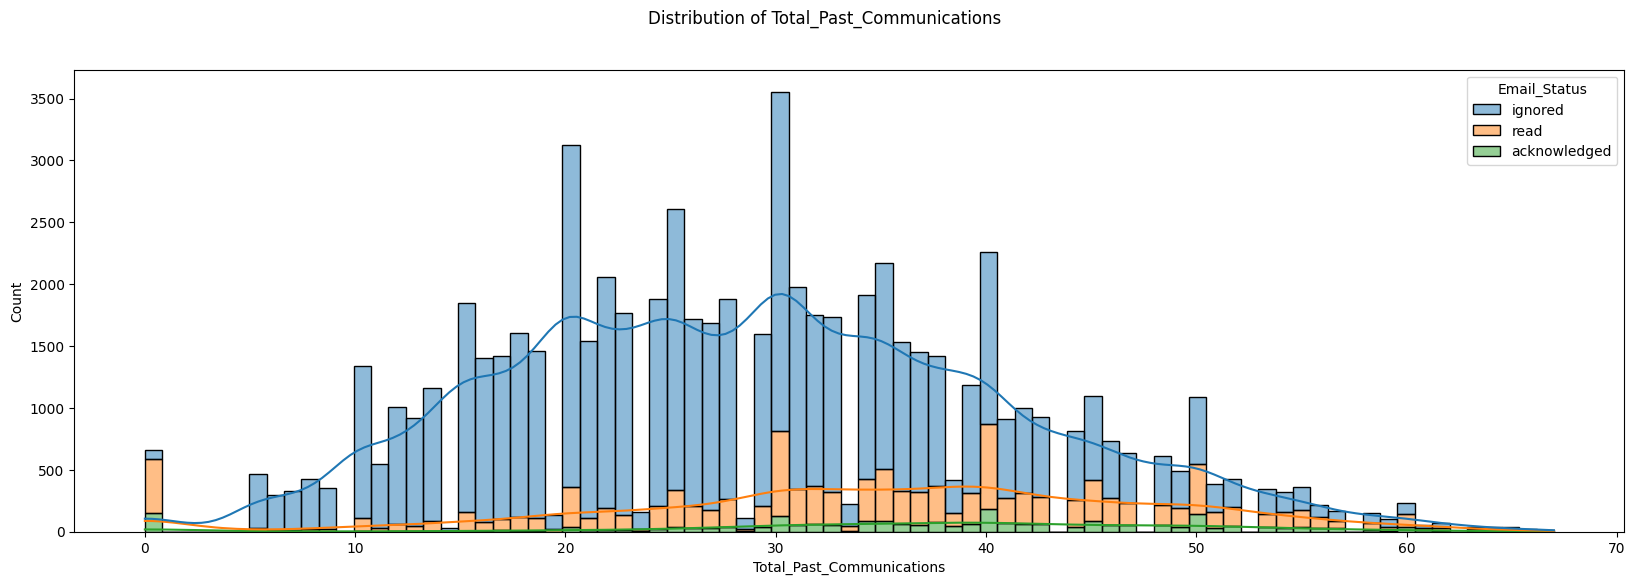

In [42]:
# Chart - 8 visualization code

fig, axes = plt.subplots(figsize=(20, 6))
fig.suptitle('Distribution of Total_Past_Communications')

sns.histplot(data=Email_Df2, x="Total_Past_Communications", kde=True , hue="Email_Status",  multiple="stack")

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

> <h2> <b> <font color ="#333">Email Source Type and Time of Email Sent Analysis:


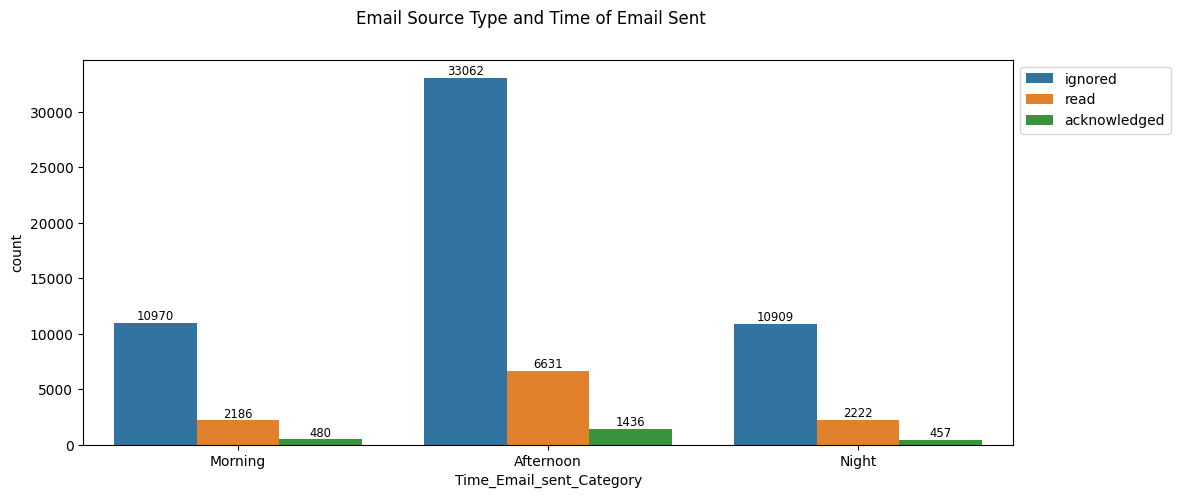

In [43]:
# Chart - 9 visualization code


fig, axes = plt.subplots(figsize=(12, 5))
fig.suptitle('Email Source Type and Time of Email Sent ')

plot6 = sns.countplot(Email_Df2, x="Time_Email_sent_Category", hue="Email_Status")

#Display count values each bar
for container in plot6.containers:
    plot6.bar_label(container, size='small')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

> <h2> <b> <font color ="#333">Email Campaign Type and Time of Email
Status :


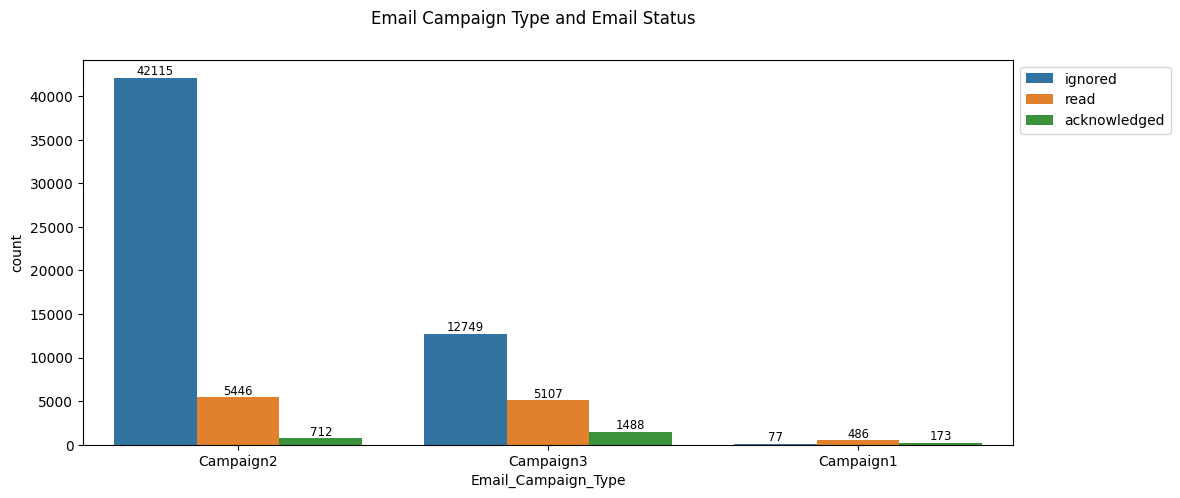

In [44]:
# Chart - 10 visualization code


fig, axes = plt.subplots(figsize=(12, 5))
fig.suptitle('Email Campaign Type and Email Status')

plot6 = sns.countplot(Email_Df2, x="Email_Campaign_Type", hue="Email_Status")

#Display count values each bar
for container in plot6.containers:
    plot6.bar_label(container, size='small')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

> <h2> <b> <font color ="#333">Total Links Count and  Email
Status :

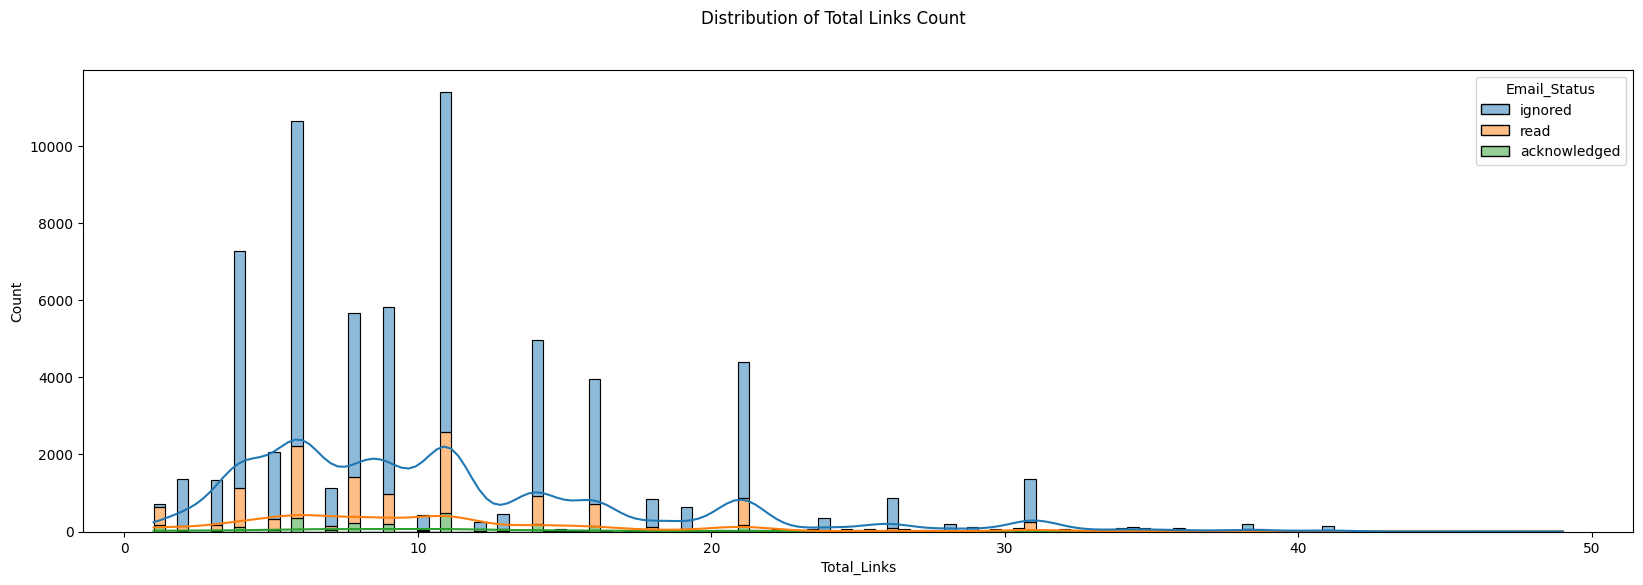

In [45]:
# Chart - 11 visualization code



fig, axes = plt.subplots(figsize=(20, 6))
fig.suptitle('Distribution of Total Links Count')

sns.histplot(data=Email_Df2, x="Total_Links", kde=True , hue="Email_Status",  multiple="stack")

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

> <h2> <b> <font color ="#333">Total Links and Total Images Relation :

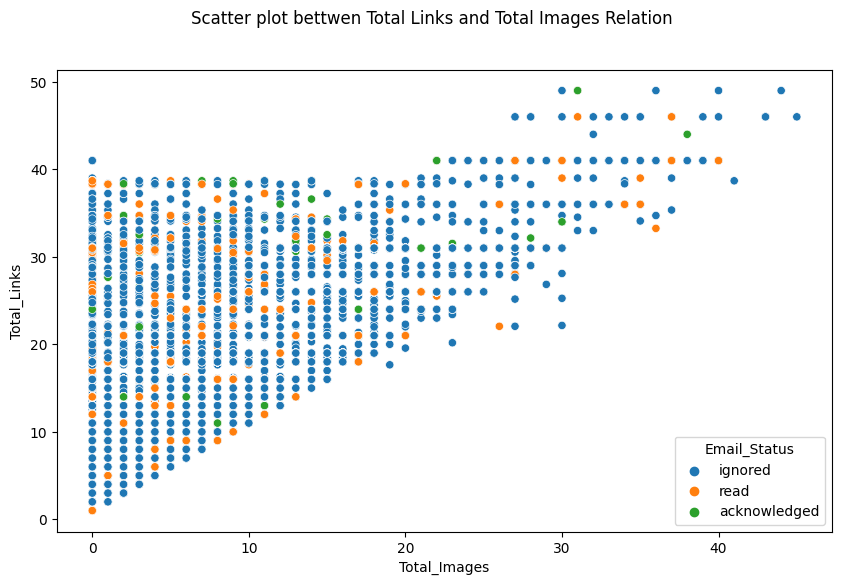

In [46]:
# Chart - 12 visualization code

fig, axes = plt.subplots(figsize=(10, 6))
fig.suptitle('Scatter plot bettwen Total Links and Total Images Relation')

#plotting scatter plot
sns.scatterplot(x=Email_Df2["Total_Images"],y=Email_Df2["Total_Links"],hue=Email_Df2['Email_Status'])

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

> <h2> <b> <font color ="#333">Email Type , Total Images and Email
Status :

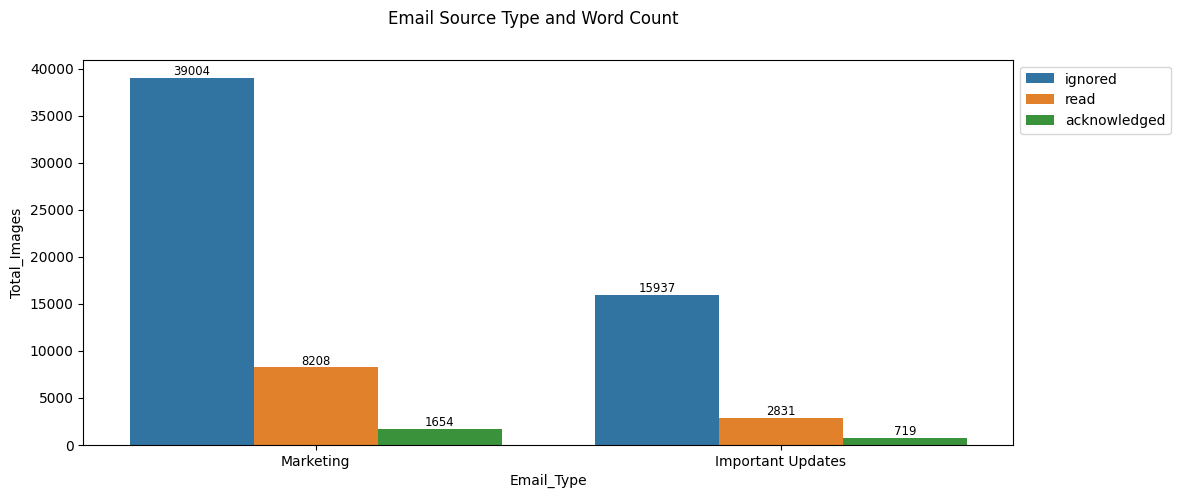

In [47]:
# Chart - 13 visualization code

fig, axes = plt.subplots(figsize=(12, 5))

fig.suptitle('Email Source Type and Word Count')

plot6 = sns.barplot(Email_Df2, x="Email_Type", y="Total_Images", hue="Email_Status" ,estimator="count",errorbar=None)

#Display count values each bar
for container in plot6.containers:
    plot6.bar_label(container, size='small')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

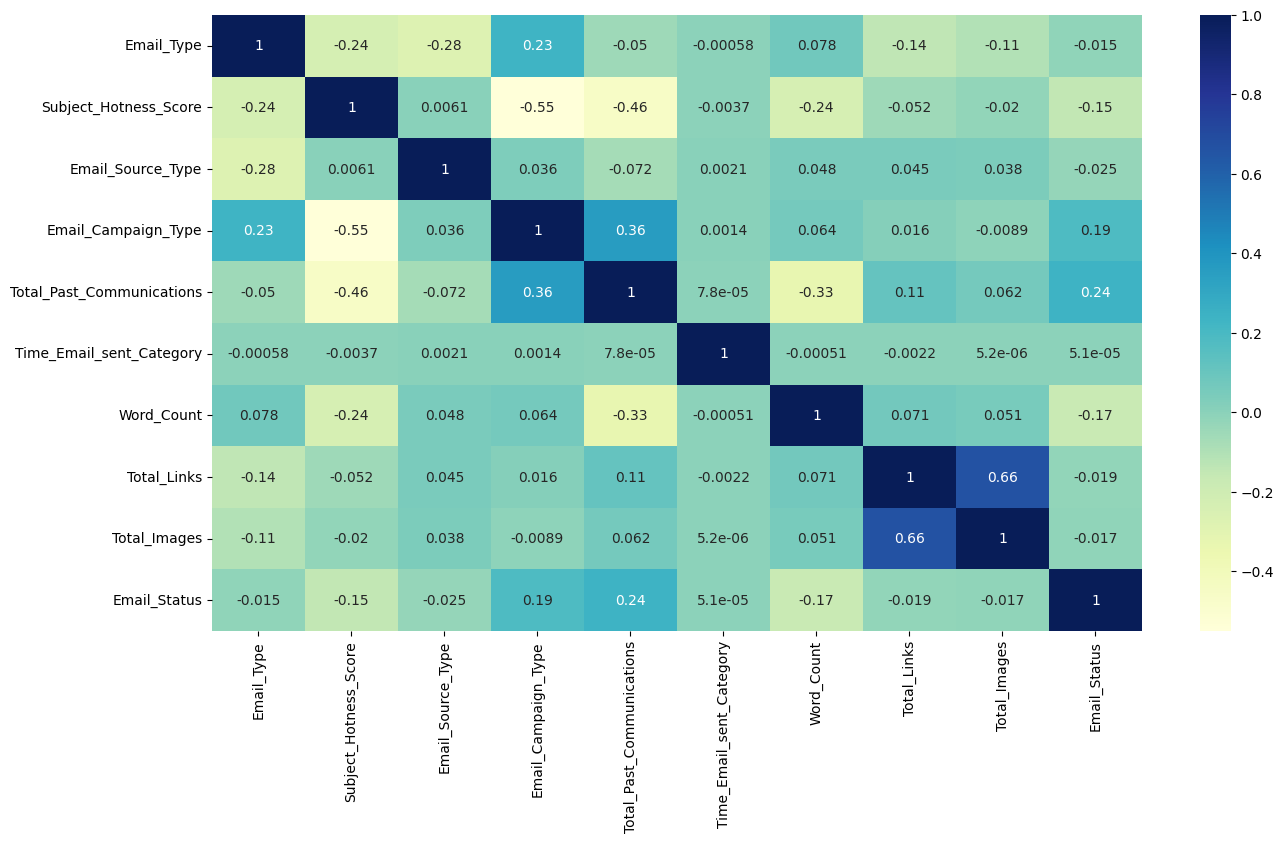

In [48]:
# Correlation Heatmap visualization code


plt.figure(figsize=(15, 8))
sns.heatmap(Email_Df3.corr(), cmap="YlGnBu", annot=True)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

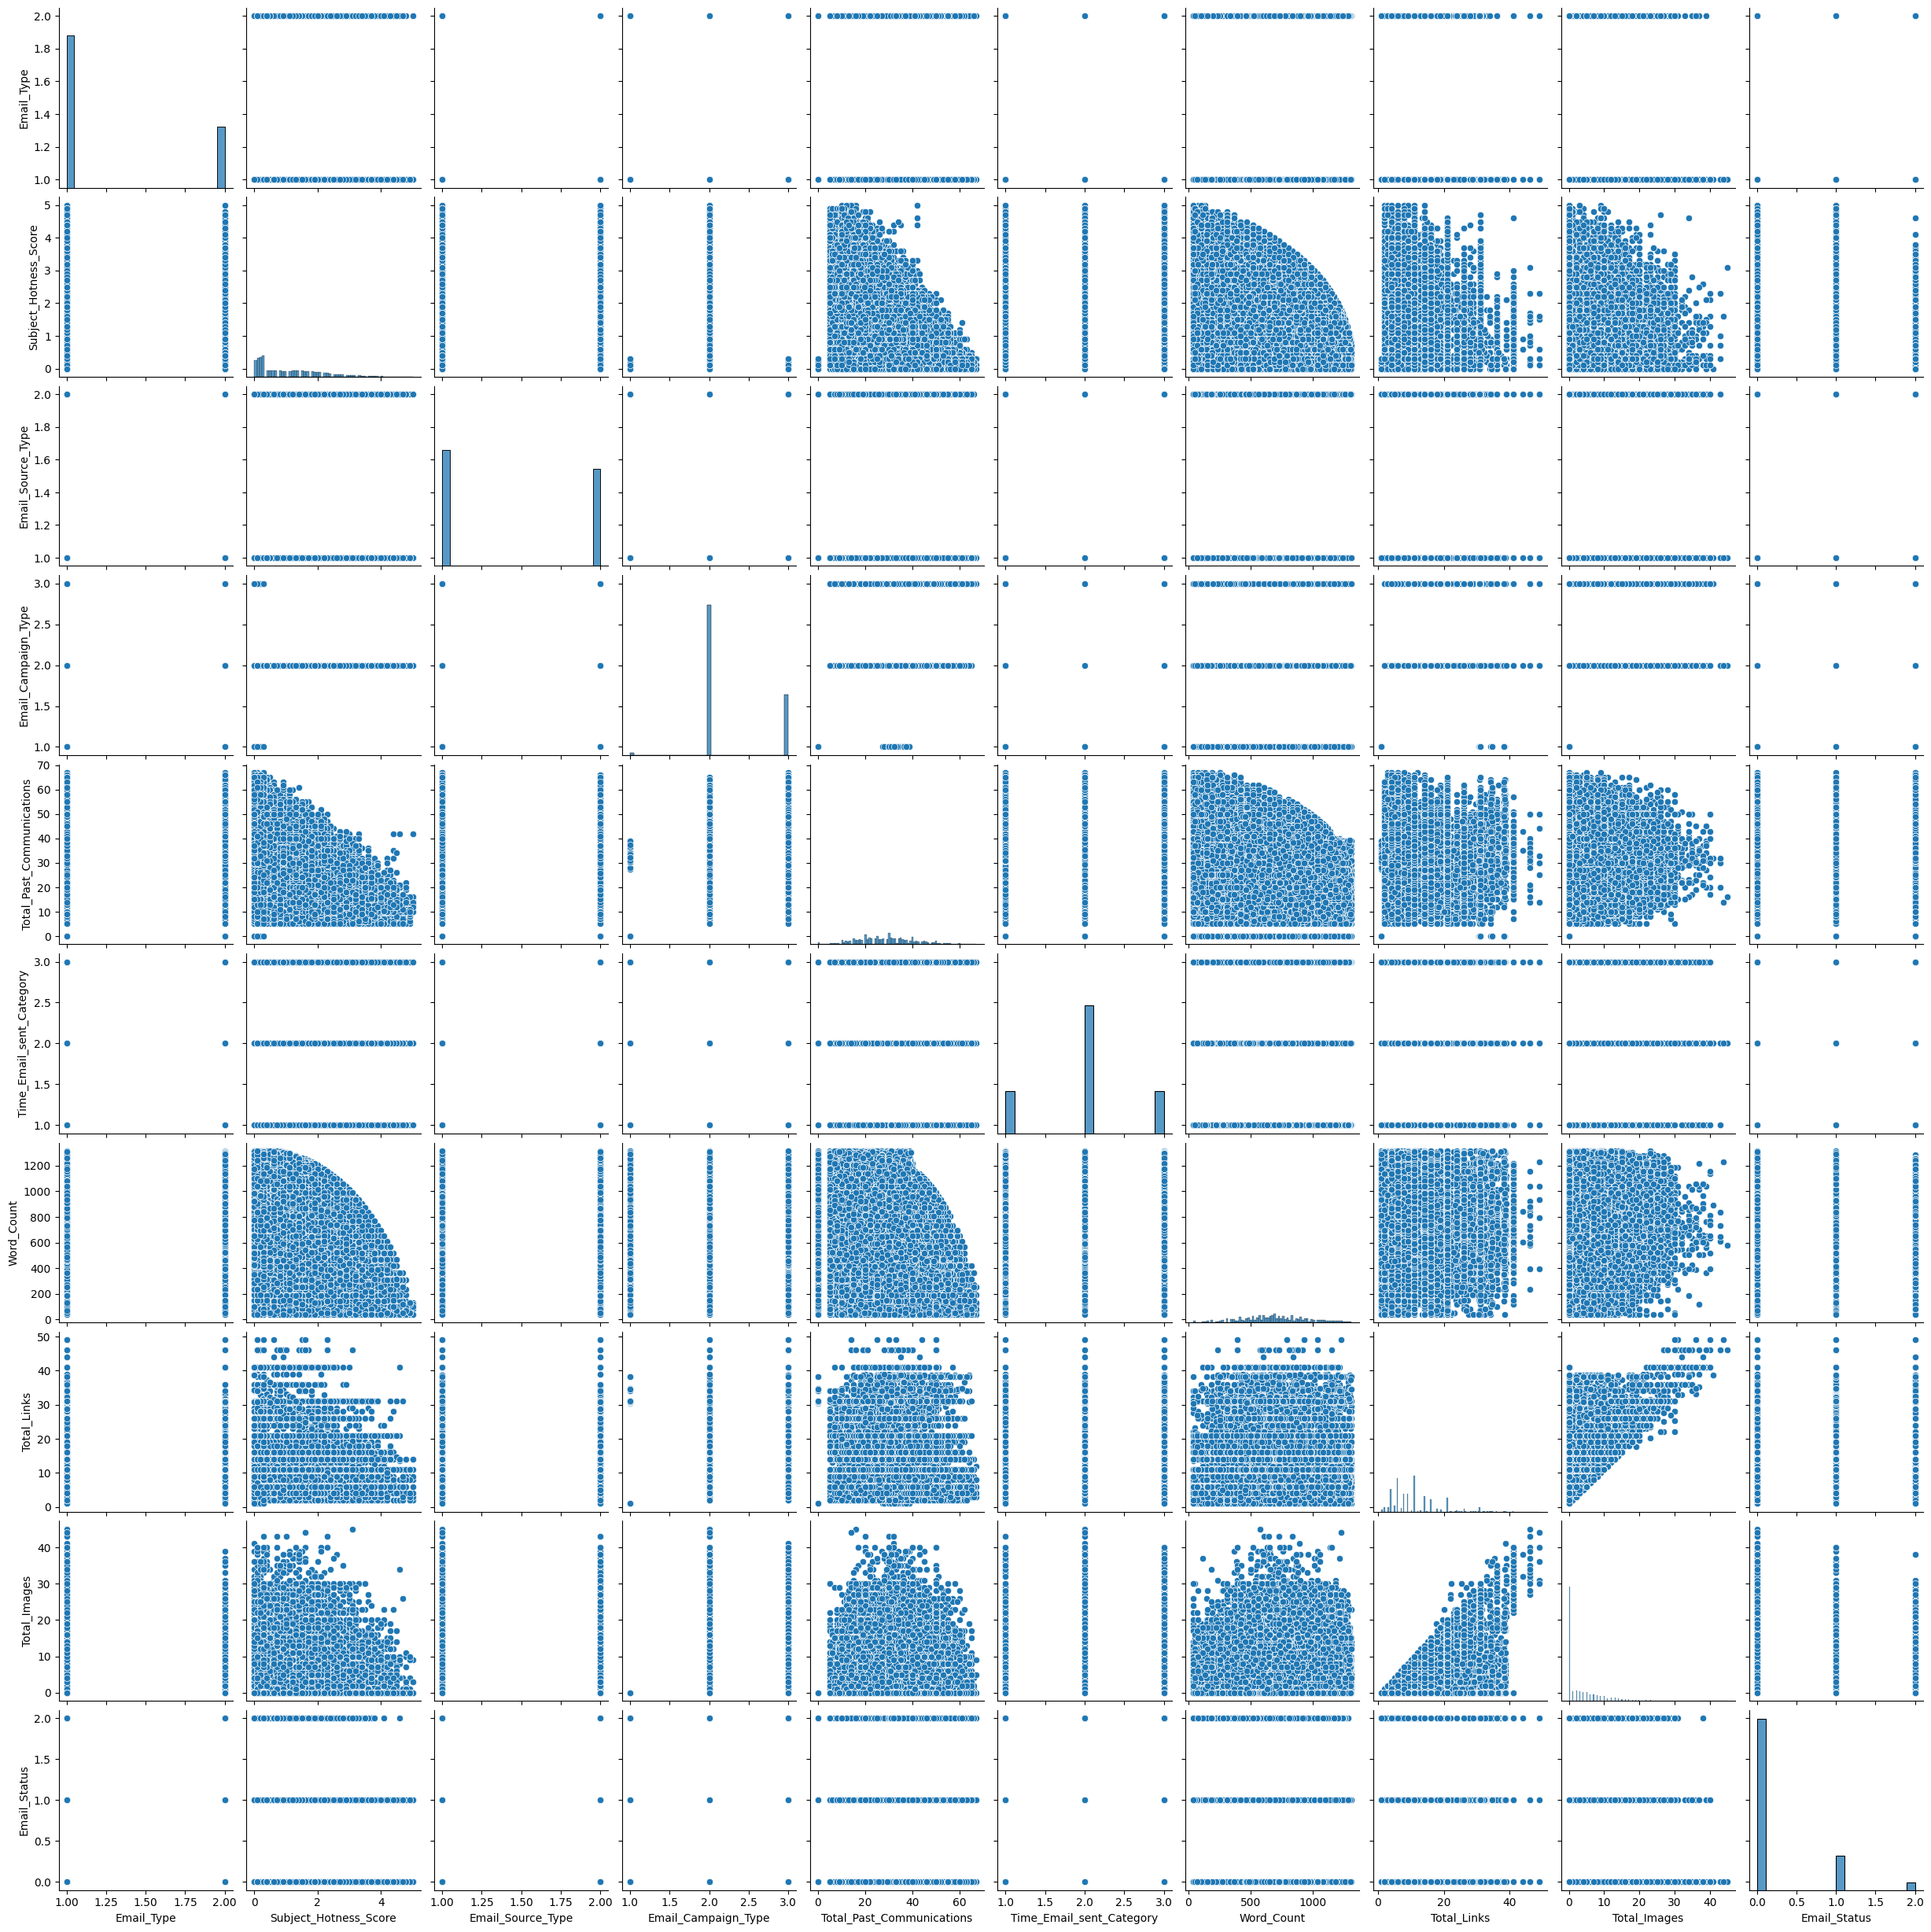

In [49]:
# Pair Plot visualization code

sns.pairplot(Email_Df3)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

<h4> <i> <b>Handling missing values operation has already been performed in  above code cells.

In [53]:
# Handling Missing Values & Missing Value Imputation


#### What all missing value imputation techniques have you used and why did you use those techniques?

<h4> Replaced the missing values with <br>

<ol> <li> <b>Mode value </b> for column Customer_Location : Customer_Location is a categorical column , hence replaced the missing values with the Mode that is the frequently repeated value.  </li>

<li> <b>Mean value </b> for column Total_Links : Total_Links is a numerical column , therefore the missing values are replaced with the average value of Total_links </li>

<li> <b>Mean value </b> for column Total_Past_Communications : Total_Past_Communications is also numerical column , therefore all the missing values are replaced with the average value of Total_Past_Communications </li>

<li> <b>Filling with zero</b> for column Total_Images : Assuming that
 an email might not contain any image and by intentionally the value is kept unfilled, hence for missing value of Total_Images is repalced with Zero   </li> <br>

### 2. Handling Outliers

<i>Before handling outliers , checking multicollinearity between continous variables using VIF (Variance Inflation Factors)

In [54]:
print('Continous Variables : ',numericals[0:3] )

Continous Variables :  ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count']


In [55]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor as vif

def VIF(Email_Data):
  VIF_data = pd.DataFrame()
  VIF_data["variables"] = Email_Data.columns
  VIF_data["VIF"] = [vif(Email_Data.values, i) for i in range(Email_Data.shape[1])]
  return(VIF_data)

vif_Data = VIF(Email_Df2[numericals])
vif_Data

,variables,VIF
0,Subject_Hotness_Score,1.748135
1,Total_Past_Communications,3.689484
2,Word_Count,3.921222
3,Total_Links,6.011266
4,Total_Images,2.464577


VIF score for Total Links is higher than 5 and is considered to be non-compliant for a prediction model. Also above scatter plot between Total_Links and Images shows are linear relation , hence combining the features in order to reduce colinearity

In [56]:
Email_Df2['Total_Images_links'] = Email_Df2['Total_Links'] + Email_Df2['Total_Images']
Email_Df2.drop(['Total_Images'],inplace=True,axis=1)
Email_Df2.drop(['Total_Links'],inplace=True,axis=1)

In [57]:
#checking colinearity again
new_numericals = numericals[0:3] + ['Total_Images_links']

vif_Data = VIF(Email_Df2[new_numericals])
vif_Data

,variables,VIF
0,Subject_Hotness_Score,1.719483
1,Total_Past_Communications,3.412881
2,Word_Count,3.723346
3,Total_Images_links,2.608566


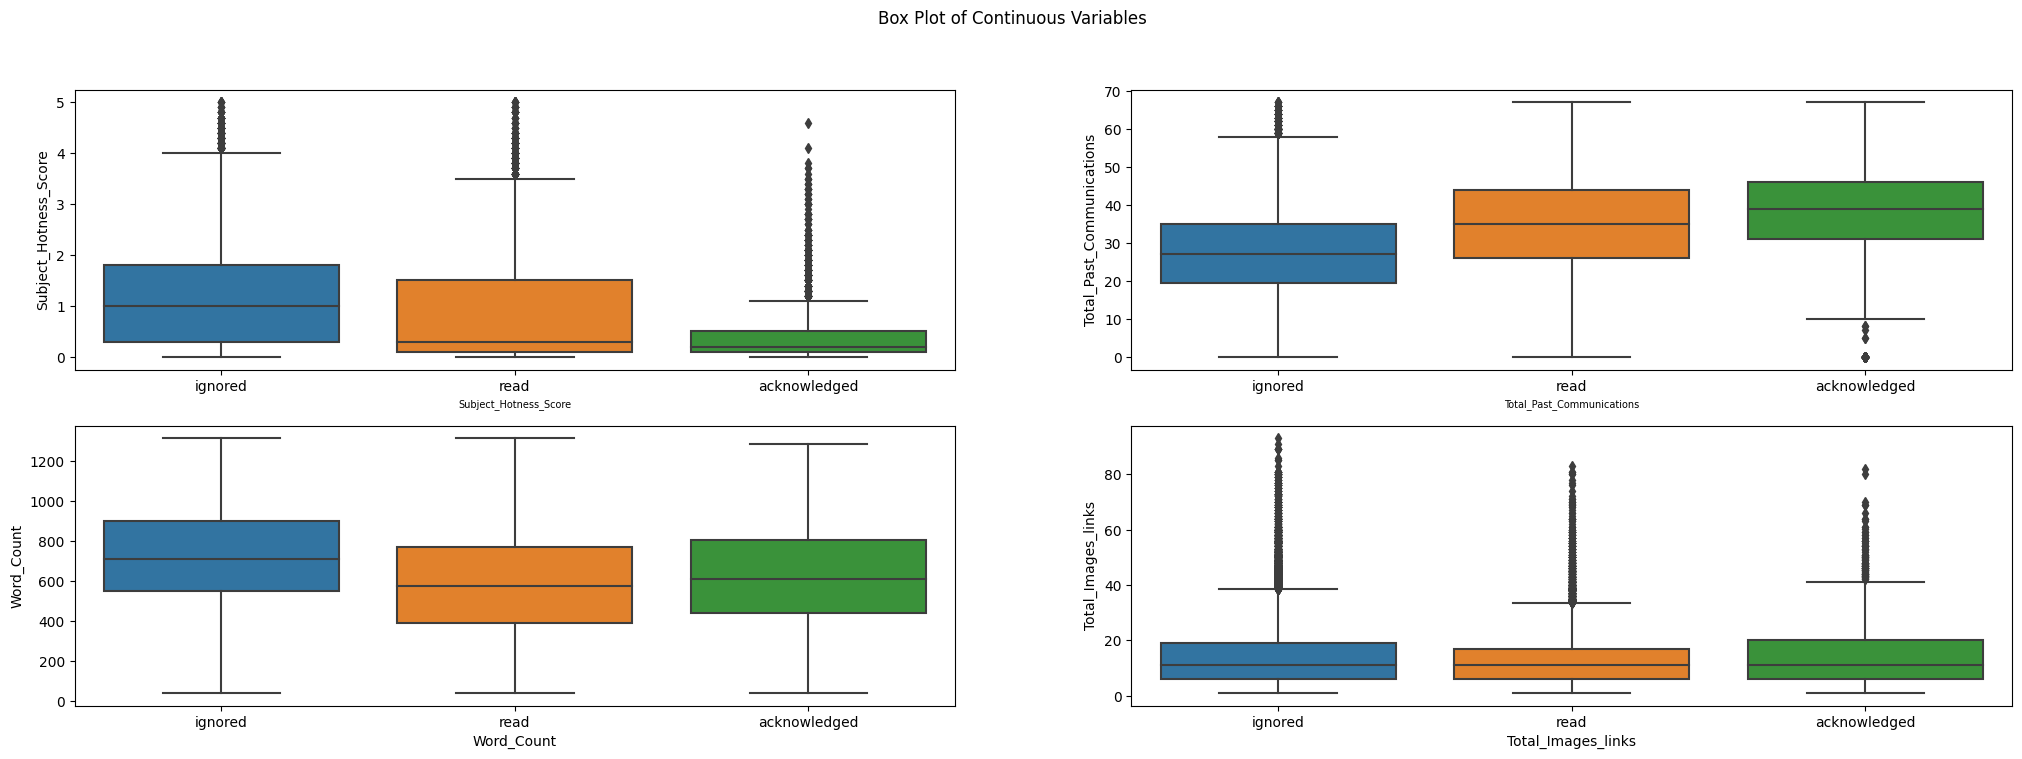

In [58]:
#checking for Outliers according to the target variables
fig, axes = plt.subplots(2, 2, figsize=(25, 8))

fig.suptitle('Box Plot of Continuous Variables')

for m,n in enumerate(new_numericals):
  if m == 0 or m == 1 :
    boxplot1 =sns.boxplot(ax=axes[0, m] , x='Email_Status', y= n, data=Email_Df2)
    boxplot1.set_xlabel(n, fontsize=7)
  else:
    boxplot1 = sns.boxplot(ax=axes[1, m-2] , x='Email_Status', y= n, data=Email_Df2)
    boxplot1.set_xlabel(n, fontsize=10)


plt.show()



The above box plot displays the presence of outliers in every column with respect to the individual categories of the dependent variable

In [59]:
# Handling Outliers & Outlier treatments

Email_Df4 = Email_Df2.copy()

#Applying Log Trannsformation

Email_Df4['Total_Images_links']=np.log(Email_Df4['Total_Images_links'])

In [60]:
def plot_compare(df , Column_name, axes, plot_type ):
  Column =  df[Column_name]
  sns.histplot(Column, kde = True , ax=axes)

  axes.axvline(Column.mean(), color= 'Red', linestyle = 'dashed', linewidth =1.5 ,label = 'Mean')
  axes.axvline(Column.median(), color= 'Green', linestyle = 'dashed', linewidth =1.5 ,label = 'Median')
  axes.axvline(Column.mode()[0], color= '#512E5F', linestyle = 'dashed', linewidth =1.5 ,label = 'Mode')

  axes.set_title(plot_type)

  # place legend outside
  axes.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

  # Display mean, median, mode values below the first plot
  axes.text(0.5, -0.2,
            f"Mean: {Column.mean():.2f}\nMedian: {Column.median():.2f}\nMode: {Column.mode()[0]:.2f}",
            horizontalalignment='left',
            verticalalignment='top',
            transform=axes.transAxes)



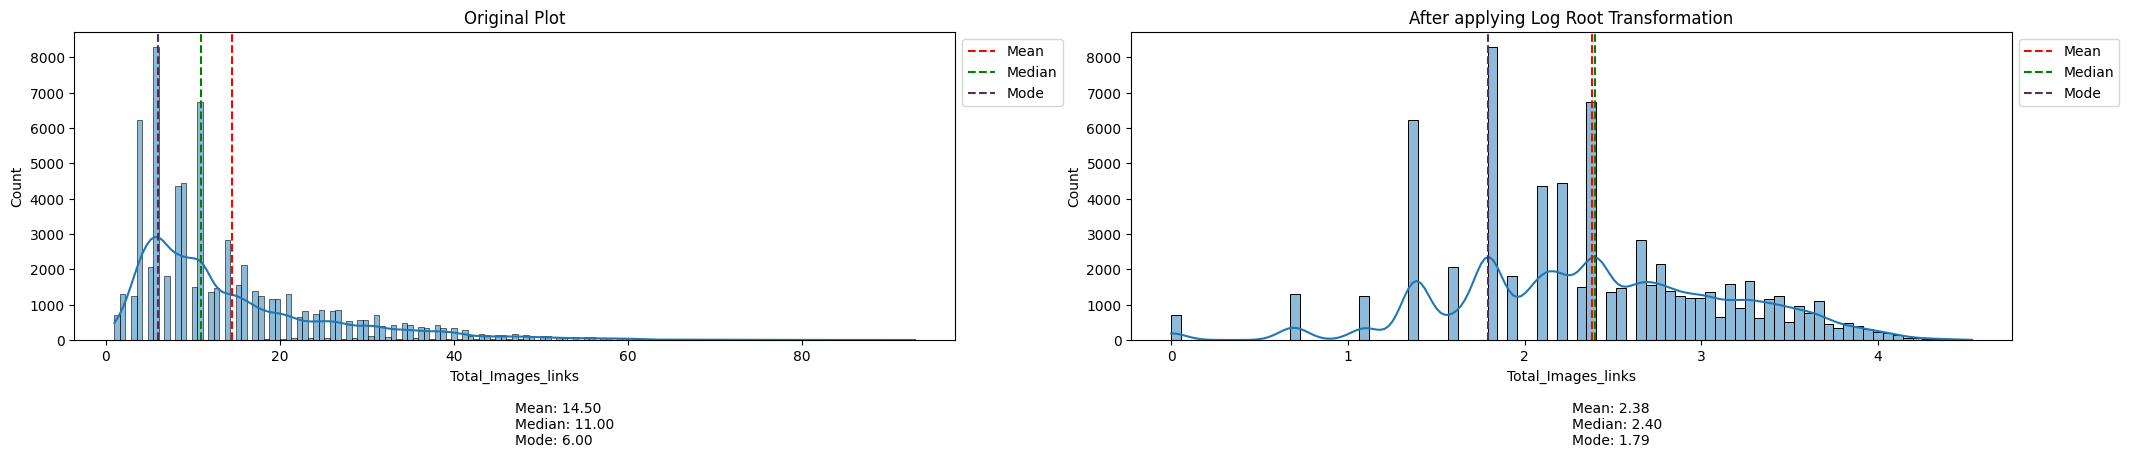

In [61]:
df = [Email_Df2 , Email_Df4]
plot_type = ['Original Plot' , 'After applying Log Root Transformation']

fig, ax = plt.subplots(1,2 , figsize=(25,4))

m = 0

for i,j in zip(df, plot_type):

  plot_compare(i , 'Total_Images_links', ax[m], j)
  m=+1

plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [62]:
print("Categorical Columns :", Col)

Categorical Columns : ['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type', 'Time_Email_sent_Category', 'Email_Status']


In [63]:
Cols  = Col[0:4]
print("Categorical Columns :", Cols)

Categorical Columns : ['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type', 'Time_Email_sent_Category']


In [64]:
Cols.append('Customer_Location')
print("Categorical Columns :", Cols)

Categorical Columns : ['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type', 'Time_Email_sent_Category', 'Customer_Location']


In [65]:
# Encode your categorical columns


# Perform Lable encoding on categorical columns
Email_Df4_encoded = pd.get_dummies(Email_Df4, columns=Cols)


In [66]:
# Encode your categorical columns
Email_Df4_encoded

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Total_Images_links,Email_Type_Important Updates,Email_Type_Marketing,Email_Source_Type_Important Admin Mail,Email_Source_Type_Sales and Marketing,Email_Campaign_Type_Campaign1,...,Time_Email_sent_Category_Afternoon,Time_Email_sent_Category_Morning,Time_Email_sent_Category_Night,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G
0,2.2,33.0,440,ignored,2.079442,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,2.1,15.0,504,ignored,1.609438,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0.1,36.0,962,read,1.609438,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,3.0,25.0,610,ignored,2.772589,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.0,18.0,947,ignored,1.386294,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68348,0.4,22.0,737,ignored,3.367296,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
68349,1.3,40.0,653,ignored,3.850148,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
68350,2.2,33.0,490,ignored,2.197225,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
68351,0.4,50.0,733,ignored,2.890372,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [67]:
# Expand Contraction

#### 2. Lower Casing

In [68]:
# Lower Casing

#### 3. Removing Punctuations

In [69]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [70]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [71]:
# Remove Stopwords

In [72]:
# Remove White spaces

#### 6. Rephrase Text

In [73]:
# Rephrase Text

#### 7. Tokenization

In [74]:
# Tokenization

#### 8. Text Normalization

In [75]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [76]:
# POS Taging

#### 10. Text Vectorization

In [77]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [78]:
# Manipulate Features to minimize feature correlation and create new features

# Feature Manipulation has alreeady been performed on above code cells.

#### 2. Feature Selection

In [79]:
# Select your features wisely to avoid overfitting

#Defining Dependent and Independent Values
X= Email_Df4_encoded.drop('Email_Status',axis = 1)
y = Email_Df4_encoded['Email_Status']

#performing Train-Test split in order to avoid data leakage

from sklearn.model_selection import train_test_split
X_train ,X_test , y_train ,y_test  = train_test_split(X,y, test_size = 0.33 , random_state = 42)

#Perform Ch22-test

##chi2 returns two values - FScore and pvalue

from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [80]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [81]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns

p_values.sort_index(ascending=False)

Word_Count                                 0.000000e+00
Total_Past_Communications                  0.000000e+00
Total_Images_links                         9.399103e-06
Time_Email_sent_Category_Night             7.230876e-01
Time_Email_sent_Category_Morning           4.430580e-01
Time_Email_sent_Category_Afternoon         9.426332e-01
Subject_Hotness_Score                     1.283951e-207
Email_Type_Marketing                       1.457526e-02
Email_Type_Important Updates               2.323981e-05
Email_Source_Type_Sales and Marketing      2.654730e-04
Email_Source_Type_Important Admin Mail     5.982417e-05
Email_Campaign_Type_Campaign3              0.000000e+00
Email_Campaign_Type_Campaign2             3.840243e-228
Email_Campaign_Type_Campaign1              0.000000e+00
Customer_Location_G                        8.390352e-01
Customer_Location_F                        7.034496e-01
Customer_Location_E                        4.020171e-01
Customer_Location_D                        8.939

In [82]:
#selecting only top 14 columns

Features = p_values.sort_index(ascending=False)
Selected_Features  = Features[0:14].index

print('Selected Features :  ', Selected_Features )

Selected Features :   Index(['Word_Count', 'Total_Past_Communications', 'Total_Images_links',
       'Time_Email_sent_Category_Night', 'Time_Email_sent_Category_Morning',
       'Time_Email_sent_Category_Afternoon', 'Subject_Hotness_Score',
       'Email_Type_Marketing', 'Email_Type_Important Updates',
       'Email_Source_Type_Sales and Marketing',
       'Email_Source_Type_Important Admin Mail',
       'Email_Campaign_Type_Campaign3', 'Email_Campaign_Type_Campaign2',
       'Email_Campaign_Type_Campaign1'],
      dtype='object')


In [83]:
X_train_FS = X_train[Selected_Features]
X_test_FS = X_test[Selected_Features]

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [84]:
# Transform Your data

> The dataset is already processed hence the dataset doesn't require any further transformation. The data is collected from various sources and is aggreegated in the dataset. Maximum columns of the dataset are in numerical values and as well Time Series analysis already performed.  

### 6. Data Scaling

In [85]:
print("Features on which Scaling needs to be done : " , new_numericals )

Features on which Scaling needs to be done :  ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Images_links']


In [86]:
# Scaling your data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_Scaled = scaler.fit_transform(X_train_FS[new_numericals]) #fit_transform method.  fit will first compute the mean and standard deviation , transform method will then perfrom the operation of scaling on the dataset
X_test_Scaled = scaler.transform(X_test_FS[new_numericals])

In [87]:
# Converting the columns into dataframe

X_train_Scaled_df = pd.DataFrame(X_train_Scaled , columns = new_numericals )
X_test_Scaled_df = pd.DataFrame(X_test_Scaled , columns = new_numericals )

In [88]:
Remaining_cols = [item for item in Selected_Features if item not in new_numericals]
Remaining_cols

['Time_Email_sent_Category_Night',
 'Time_Email_sent_Category_Morning',
 'Time_Email_sent_Category_Afternoon',
 'Email_Type_Marketing',
 'Email_Type_Important Updates',
 'Email_Source_Type_Sales and Marketing',
 'Email_Source_Type_Important Admin Mail',
 'Email_Campaign_Type_Campaign3',
 'Email_Campaign_Type_Campaign2',
 'Email_Campaign_Type_Campaign1']

In [89]:
# Concatenate along rows (axis=0)
X_train_Scaled_df1 = pd.concat([X_train_Scaled_df,  X_train_FS[Remaining_cols]], axis=1)
X_test_Scaled_df1 = pd.concat([X_test_Scaled_df,  X_test_FS[Remaining_cols]], axis=1)

In [90]:
X_train_Scaled_df1.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Images_links,Time_Email_sent_Category_Night,Time_Email_sent_Category_Morning,Time_Email_sent_Category_Afternoon,Email_Type_Marketing,Email_Type_Important Updates,Email_Source_Type_Sales and Marketing,Email_Source_Type_Important Admin Mail,Email_Campaign_Type_Campaign3,Email_Campaign_Type_Campaign2,Email_Campaign_Type_Campaign1
0,0.911895,0.089126,-1.135712,1.506057,0,1,0,1,0,1,0,0,1,0
1,-0.093400,0.503897,-0.351701,-0.392141,1,0,0,1,0,1,0,0,1,0
2,1.917190,-1.735870,0.075273,-0.392141,0,0,1,1,0,1,0,0,1,0
3,-0.897636,0.172080,0.660520,-0.392141,0,0,1,0,1,0,1,1,0,0
4,-1.098694,1.416395,0.513288,1.506057,0,1,0,0,1,1,0,1,0,0


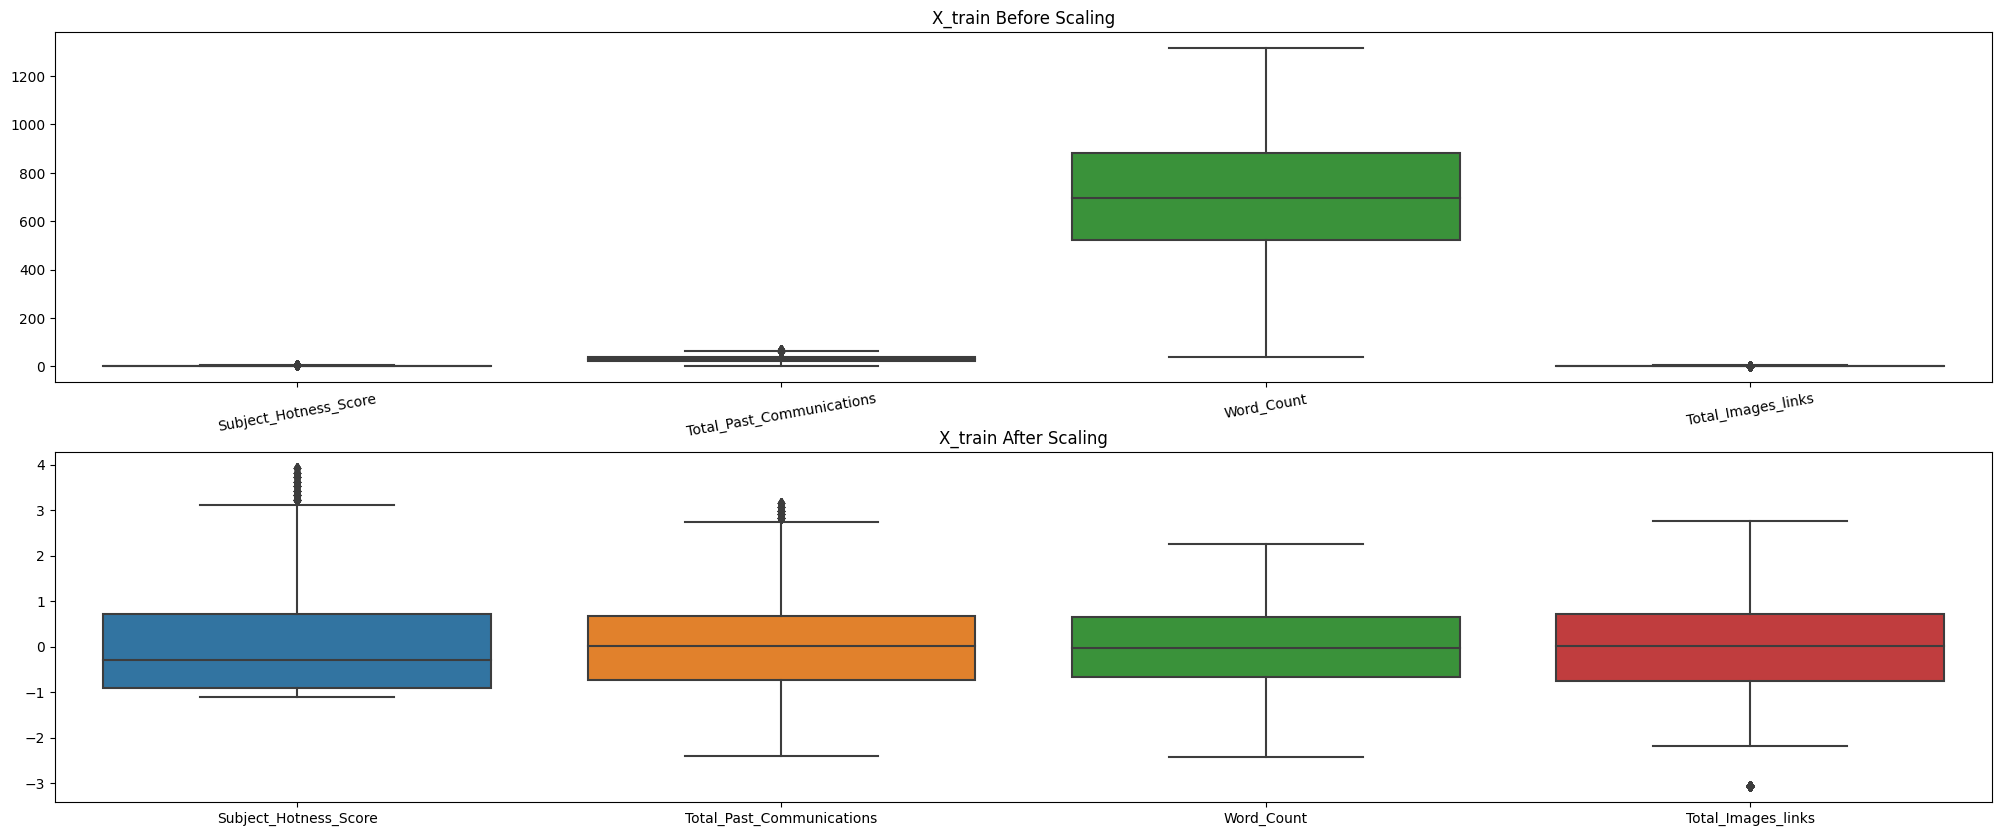

In [91]:
plt.subplots(figsize= (25,10))
plt.subplot(2,1,1)
sns.boxplot(data = X_train_FS[new_numericals])
plt.title('X_train Before Scaling')
plt.xticks(rotation = 10)




plt.subplot(2,1,2)
sns.boxplot(data =X_train_Scaled_df1[new_numericals])
plt.title('X_train After Scaling')

plt.show()

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

> Dimensionality reduction operation is not required. As the  technique reduces the number of features in a dataset while retaining as much of the important information as possible but in this case the dimensionality reduction should not be used.
Also Dimensionality reduction may lead to some amount of data loss, which can impact the performance of the model .




In [92]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [93]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Data Spliting operation has already been performed in above code block cells.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Dataset imbalanced is required as the

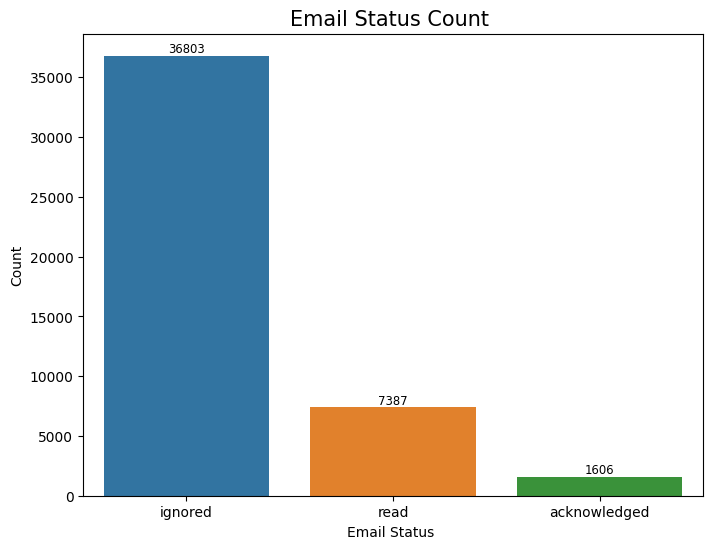

In [95]:
count_plot(y_train,"Email Status Count ",'Email Status ','Count')

In [96]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

def imbalanced_dataset(X, y):
  oversample = SMOTE()
  X ,y = oversample.fit_resample(X, y)
  return X, y



Xtrain , ytrain = imbalanced_dataset(X_train_Scaled_df1, y_train)


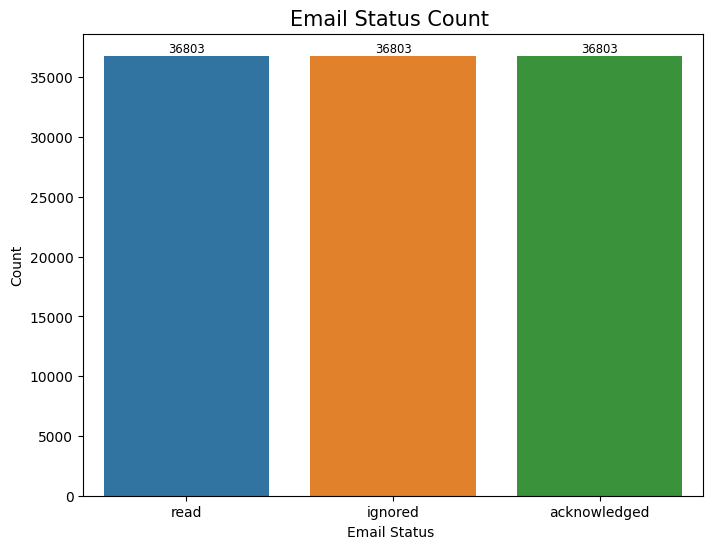

In [97]:
count_plot(ytrain,"Email Status Count ",'Email Status ','Count')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [356]:
import pandas as pd



# Creating MultiIndex for columns
columns_index = pd.MultiIndex.from_tuples([(' ', 'Model_name'),
                                        ('Train', 'Accuracy'), ('Train', 'Recall') , ('Train', 'Precision') ,
                                         ('Train', 'F1score') ,('Train', 'AUC'),
                                        ('Test', 'Accuracy'),('Test', 'Recall'), ('Test', 'Precision') ,
                                           ('Test', 'F1score'),('Test', 'AUC')]
                                          )


# Creating an empty DataFrame with MultiIndex columns
model_data = pd.DataFrame(columns=columns_index)
model_data


Empty DataFrame
Columns: [( , Model_name), (Train, Accuracy), (Train, Recall), (Train, Precision), (Train, F1score), (Train, AUC), (Test, Accuracy), (Test, Recall), (Test, Precision), (Test, F1score), (Test, AUC)]
Index: []

In [349]:
# Styling function to set border style
def set_border_style(val):
    return 'border: 1px solid black'

# Styling options for both data cells and headers
styles = [
    {
        'selector': 'td',
        'props': [('border', '1px solid black')]
    },
    {
        'selector': 'th',
        'props': [('border', '1px solid black'),('text-align', 'center')]
    }
]

# Apply the border style to the DataFrame using the Styler
model_data.style.set_table_styles(styles)

In [94]:
!pip install scikit-plot

In [296]:
# importing libraries

import scikitplot as skplt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , precision_score, roc_auc_score, f1_score, recall_score,roc_curve
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [357]:

#Creating MODEL class , for proper presentation of every summuarised modeel

class MODEL:

  def __init__(self, model_name ,model, X_train , X_test , y_train ,  y_test , y_pred):

    self.model_name = model_name
    self.model = model
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test

    self.y_pred = y_pred


  def model_accuracy(self):

    # Calculate the training accuracy
    self.training_accuracy = self.model.score(self.X_train , self.y_train )
    print(f"Training Accuracy: {training_accuracy:.4f}")

    # Calculate the testing accuracy
    self.testing_accuracy = self.model.score(self.X_test, self.y_test)
    print(f"Testing Accuracy: {testing_accuracy:.4f}")

    return self.training_accuracy , self.testing_accuracy

  def Confusion_Matrix(self):
    # Predictions on the training set
    self.y_train_pred = self.model.predict(self.X_train)

    print("-------- Confusion Matrix Train -------- \n",confusion_matrix(self.y_train, self.y_train_pred))

    print("\n")

    print("-------- Confusion Matrix Test -------- \n",confusion_matrix(self.y_test, self.y_pred))

  def Classificaton_Report(self):
    print("\n-------- Classification Report -------- \n")
    # Predictions on the training set
    print(classification_report(self.y_test, self.y_pred))

    #Recall RUS
    self.Recall_train = recall_score(self.y_train,self.y_train_pred, average='weighted')
    self.Recall_test = recall_score(self.y_test,self.y_pred, average='weighted')

    #Precision RUS
    self.Precision_train = precision_score(self.y_train,self.y_train_pred, average='weighted')
    self.Precision_test = precision_score(self.y_test,self.y_pred, average='weighted')

    #F1 Score RUS
    self.F1_train = f1_score(self.y_train, self.y_train_pred, average='weighted')
    self.F1_test = f1_score(self.y_test, self.y_pred, average='weighted')

  def plot_AUC(self ,train_prob , test_prob):
    self.train_prob = train_prob
    self.test_prob = test_prob


    #ROC-AUC RUS
    self.AUC_train = roc_auc_score(self.y_train,self.train_prob,average='weighted',multi_class = 'ovr')
    self.AUC_test = roc_auc_score(self.y_test,self.test_prob,average='weighted',multi_class = 'ovr')


    #create ROC curve
    fpr = {}
    tpr = {}
    thresh ={}
    no_of_class=3
    color = ['red', 'blue', 'green']

    i = 0
    for x in self.y_train.unique():
      fpr[x], tpr[x], thresh[x] = metrics.roc_curve(self.y_test, self.test_prob[:,i], pos_label=x)
      plt.plot(fpr[x], tpr[x], linestyle='--',color= color[i] , label= x)

      i = i+1

    plt.title('Multiclass ROC of ' + str(self.model_name))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

  def print_summary(self):

    print("---------",self.model_name , "---------")

    self.train = PrettyTable()
    self.train.field_names = ["Accuracy",	"Recall","Precision"	,"F1score", "AUC"]

    self.train_data = [self.training_accuracy ,self.Recall_train,self.Precision_train,self.F1_train , self.AUC_train]

    self.train.add_row( self.train_data)
    self.train.align["Model Name"] = "l"

    print('Train')

    print(self.train)

    self.test = PrettyTable()
    self.test.field_names = ["Accuracy",	"Recall","Precision"	,"F1score", "AUC"]

    self.test_data = [self.testing_accuracy ,self.Recall_test,self.Precision_test,self.F1_test , self.AUC_test]

    self.test.add_row(self.test_data)
    self.test.align["Model Name"] = "l"

    print('Test')

    print(self.test)

    self.final_data = self.train_data + self.test_data



  def update_Summary(self):
    new_data = [round(x,4) for x  in self.final_data]
    new_data.insert(0,self.model_name)

    # Updating the last row
    model_data.loc[model_data.shape[0]] = new_data

    return model_data.style.set_table_styles(styles)


### ML Model - 1

> <h3> <b> LOGISTIC REGRESSION :

In [194]:
# ML Model - 1 Implementation
classification = LogisticRegression(max_iter  = 200)


# Fit the Algorithm
classification.fit(Xtrain , ytrain )

# Predict on the model
y_pred  = classification.predict(X_test_Scaled_df1)

In [210]:
#Calculating Probabiltiy
train_prob = classification.predict_proba(Xtrain)
test_prob = classification.predict_proba(X_test_Scaled_df1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Training Accuracy: 0.5425
Testing Accuracy: 0.6267
-------- Confusion Matrix Train -------- 
 [[25196  6325  5282]
 [ 5779 25881  5143]
 [16517 11468  8818]]


-------- Confusion Matrix Test -------- 
 [[  502   145   120]
 [ 2817 12704  2617]
 [ 1611  1110   931]]

-------- Classification Report -------- 

              precision    recall  f1-score   support

acknowledged       0.10      0.65      0.18       767
     ignored       0.91      0.70      0.79     18138
        read       0.25      0.25      0.25      3652

    accuracy                           0.63     22557
   macro avg       0.42      0.54      0.41     22557
weighted avg       0.78      0.63      0.68     22557



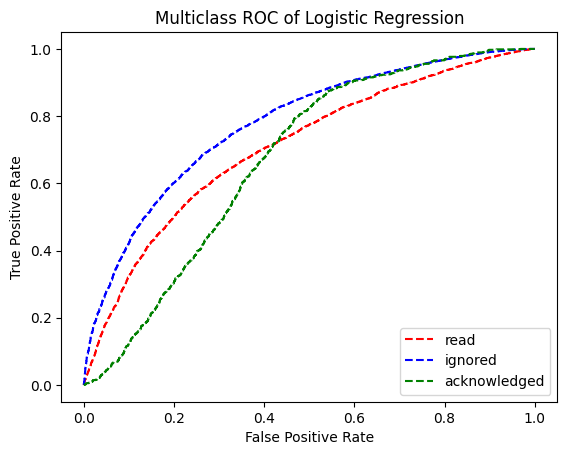

In [358]:
# Visualizing evaluation Metric Score chart
LR = MODEL('Logistic Regression' ,classification, Xtrain , X_test_Scaled_df1 , ytrain ,  y_test , y_pred)
Train_acc , Test_acc = LR.model_accuracy()

LR.Confusion_Matrix()

LR.Classificaton_Report()

#ploting AUC Curve
LR.plot_AUC(train_prob , test_prob)

In [359]:
LR.print_summary()

--------- Logistic Regression ---------
Train
+--------------------+--------------------+-------------------+--------------------+--------------------+
|      Accuracy      |       Recall       |     Precision     |      F1score       |        AUC         |
+--------------------+--------------------+-------------------+--------------------+--------------------+
| 0.5424829497595305 | 0.5424829497595305 | 0.527123717028816 | 0.5185551329005562 | 0.7291551166370195 |
+--------------------+--------------------+-------------------+--------------------+--------------------+
Test
+--------------------+--------------------+--------------------+--------------------+--------------------+
|      Accuracy      |       Recall       |     Precision      |      F1score       |        AUC         |
+--------------------+--------------------+--------------------+--------------------+--------------------+
| 0.6267234118012147 | 0.6267234118012146 | 0.7763586167342719 | 0.6836984076978477 | 0.7679958023

In [360]:
LR.update_Summary()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'penalty' : ('l1','l2','elasticnet'), 'C' : [1,10,20,30, 100],  }
classifier  = LogisticRegression(max_iter  = 200)
LR_GSCV  = GridSearchCV(classifier , param_grid = parameters , cv = 10)

# Fit the Algorithm
LR_GSCV.fit(X_resampled, y_resampled)

# Predict on the model
y_pred = LR_GSCV.predict(X_test_Scaled_df1)

In [ ]:
# Print the best parameters
LR_GSCV.best_params_

{'C': 30, 'penalty': 'l2'}

In [ ]:
# Calculate the training accuracy
training_accuracy = LR_GSCV.score(X_resampled, y_resampled)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate the testing accuracy
testing_accuracy = LR_GSCV.score(X_test_Scaled_df1, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

Training Accuracy: 0.4959
Testing Accuracy: 0.5270


In [ ]:
# Visualizing evaluation Metric Score chart
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  511   153   103]
 [ 5005 10696  2437]
 [ 1854  1055   743]]
0.529769029569535
              precision    recall  f1-score   support

           0       0.07      0.67      0.13       767
           1       0.90      0.59      0.71     18138
           2       0.23      0.20      0.21      3652

    accuracy                           0.53     22557
   macro avg       0.40      0.49      0.35     22557
weighted avg       0.76      0.53      0.61     22557



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

> <h3> <b> DECISION TREE :

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Fit and transform the training data
X_resampled, y_resampled = oversampler.fit_resample(X_train_FS, y_train)

In [ ]:
#Xtrain , ytrain = imbalanced_dataset(X_train_FS, y_train)

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_resampled, y_resampled)
y_pred = gnb.predict(X_test_FS)

# Calculate the training accuracy
training_accuracy = gnb.score(X_resampled, y_resampled)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate the testing accuracy
testing_accuracy = gnb.score(X_test_FS, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

Training Accuracy: 0.4910
Testing Accuracy: 0.5118


In [ ]:
# ML Model - 2 Implementation
DT1   = DecisionTreeClassifier(criterion= 'entropy')



# Fit the Algorithm
DT1.fit(X_resampled, y_resampled)

# Predict on the model
y_pred  = DT1.predict(X_test_FS)

In [ ]:
# Calculate the training accuracy
training_accuracy = DT1.score(Xtrain, ytrain)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate the testing accuracy
testing_accuracy = DT1.score(X_test_FS, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

Training Accuracy: 0.6462
Testing Accuracy: 0.7186


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
gnb = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_resampled, y_resampled)

# Predict on the model
y_pred  = grid_search.predict(X_test_FS)

# Calculate the training accuracy
training_accuracy = grid_search.score(X_resampled, y_resampled)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate the testing accuracy
testing_accuracy = grid_search.score(X_test_FS, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Print the best parameters and the corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Training Accuracy: 0.4910
Testing Accuracy: 0.5118
Best Parameters:  {'var_smoothing': 1e-09}
Best Accuracy:  0.49119180842765875


In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [10,20,30,50,100],
    'max_features' : ['auto','sqrt','log2']
}

classifier = DecisionTreeClassifier()
DT2 = GridSearchCV(classifier , param_grid = parameter , cv = 15 )

# Fit the Algorithm
DT2.fit(X_resampled, y_resampled)

# Predict on the model
y_pred  = DT2.predict(X_test_FS)

# Calculate the training accuracy
training_accuracy = DT2.score(X_resampled, y_resampled)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate the testing accuracy
testing_accuracy = DT2.score(X_test_FS, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

Training Accuracy: 0.9998
Testing Accuracy: 0.7232


In [ ]:
# Print the best parameters
DT2.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'sqrt',
 'splitter': 'best'}

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

# Fit the Algorithm
KNN.fit(Xtrain , ytrain)

# Predict on the model
y_pred  = KNN.predict(X_test_FS)

# Calculate the training accuracy
training_accuracy = KNN.score(Xtrain, ytrain)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate the testing accuracy
testing_accuracy = KNN.score(X_test_FS, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

Training Accuracy: 0.9162
Testing Accuracy: 0.5865


In [ ]:
# ML Model - 3 Implementation

RFC = RandomForestClassifier()

# Fit the Algorithm
RFC.fit(Xtrain , ytrain)

# Predict on the model
y_pred  = RFC.predict(X_test_FS)

# Calculate the training accuracy
training_accuracy = RFC.score(Xtrain, ytrain)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate the testing accuracy
testing_accuracy = RFC.score(X_test_FS, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

Training Accuracy: 0.9990
Testing Accuracy: 0.7200


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

params = {'max_depth' : [3,5,10,50,100],
          'n_estimators' : [100,200] ,
          'criterion' : ['gini', 'entropy']}

Regressor = RandomForestClassifier()

# Fit the Algorithm

RFcv = GridSearchCV(Regressor, param_grid = params , cv = 7 , verbose = 3)
RFcv.fit(Xtrain, ytrain)


# Predict on the model
y_pred  = RFcv.predict(X_test_FS)

Fitting 7 folds for each of 20 candidates, totalling 140 fits
[CV 1/7] END criterion=gini, max_depth=3, n_estimators=100;, score=0.513 total time=   8.1s
[CV 2/7] END criterion=gini, max_depth=3, n_estimators=100;, score=0.527 total time=   4.0s
[CV 3/7] END criterion=gini, max_depth=3, n_estimators=100;, score=0.528 total time=   3.1s
[CV 4/7] END criterion=gini, max_depth=3, n_estimators=100;, score=0.530 total time=   4.6s
[CV 5/7] END criterion=gini, max_depth=3, n_estimators=100;, score=0.541 total time=   3.8s
[CV 6/7] END criterion=gini, max_depth=3, n_estimators=100;, score=0.532 total time=   3.1s
[CV 7/7] END criterion=gini, max_depth=3, n_estimators=100;, score=0.540 total time=   3.1s
[CV 1/7] END criterion=gini, max_depth=3, n_estimators=200;, score=0.513 total time=   8.1s
[CV 2/7] END criterion=gini, max_depth=3, n_estimators=200;, score=0.528 total time=   6.4s
[CV 3/7] END criterion=gini, max_depth=3, n_estimators=200;, score=0.528 total time=   7.0s
[CV 4/7] END crite

In [ ]:
# Calculate the training accuracy
training_accuracy = RFcv.score(Xtrain, ytrain)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculate the testing accuracy
testing_accuracy = RFcv.score(X_test_FS, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

Training Accuracy: 0.9990
Testing Accuracy: 0.7200


In [ ]:
# Print the best parameters
RFcv.best_params_

{'criterion': 'gini', 'max_depth': 100, 'n_estimators': 200}

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***